In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, mean_squared_error, mean_absolute_error, r2_score

# **Pengumpulan Data**

Membaca Dataset

In [ ]:
df = pd.read_csv("/content/hasil monev banmod - 2123.xlsx - data.csv")
df

,NO,NAMA,ALAMAT,RT,RW,HP,KEL,KEC,THN DAPAT,JENIS USAHA,BESAR BANTUAN,JENIS SARPRAS,NILAI SARPRAS,HASIL MONEV (OMZET),PELATIHAN YANG DIINGINKAN,KETERANGAN,NIK,JENIS KELAMIN,USIA
0,1,ADE NURALINA,PERUM DHOHO INDAH D22,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,Usaha Perdagangan Lainnya,2400000,"Tungku/kompor,cup sealer,meja lipat,jar",2120000.0,naik,pemasaran,NaN,3.57E+15,Perempuan,57
1,2,HARI IRIYANTO,SEMAMPIR1NO 82B,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,"toko (pracangan, los pasar tradisional, buku, ...",2400000,Obrok,700000.0,naik,pemasaran,NaN,3.57E+15,Laki-laki,60
2,3,JUSTINE SETIAWATI,JLN. SEMAMPIR GANG 1 NO.90,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,"rumah makan (warung, café, restoran, kedai mak...",2400000,"Wajan,dandang,kursi sendok garpu kompor panci",1927000.0,naik,pemasaran,NaN,3.57E+15,Perempuan,37
3,4,LISAKURNIA AZIZADIYATI,JL SEMAMPIR 1/82B,1.0,1.0,6.29E+12,BALOWERTI,KECAMATAN KOTA,2023,"Tambal ban, Jual Bensin Eceran",2400000,Rombong,1400000.0,tetap,Pemasaran,NaN,3.57E+15,Perempuan,21
4,5,MARIDI,JLN. SEMAMPIR 1 86B,1.0,1.0,6.28E+12,BALOWERTI,KECAMATAN KOTA,2023,Usaha Perdagangan Lainnyafashion (barang jadi ...,2400000,"kursi,kipas,setrika",940000.0,tetap,Pemasaran,NaN,3.57E+15,Laki-laki,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11988,11989,WAWAN DWI SANTOSO,Lingkungan Tirtoudan rt 031 rw 011 Kelurahan T...,31.0,11.0,81930002425,Tosaren,Pesantren,2022,Makanan dan Minuman,7410000,NaN,4850000.0,Tetap,Pemasaran,NaN,3.51E+15,Laki-laki,36
11989,11990,YAYUK,Jl Tosaren 2 no 65 Tosaren kota kediri,NaN,NaN,87858919996,Tosaren,Pesantren,2022,Pedagang rempah-rempah,3950000,NaN,2500000.0,NaN,NaN,NaN,3.51E+15,Perempuan,41
11990,11991,YOYOK PRAYITNO,"Perum Puri Asri 2 Blok A2 Rt 44 Rw 16,Keluraha...",44.0,16.0,85735187570,Tosaren,Pesantren,2022,Makanan dan Minuman,4730000,NaN,3000000.0,tetap,pemasaran,NaN,3.51E+15,Laki-laki,39
11991,11992,YUNI LESTARI,Tosaren RT 03 rw 01 pesantren kediri,3.0,1.0,85859670194,Tosaren,Pesantren,2022,Toko,9950000,NaN,6500000.0,NaN,NaN,NaN,3.57E+15,Perempuan,43


Statistik deskriptif dari data

In [ ]:
df.describe(include='all')

,NO,NAMA,ALAMAT,RT,RW,HP,KEL,KEC,THN DAPAT,JENIS USAHA,BESAR BANTUAN,JENIS SARPRAS,NILAI SARPRAS,HASIL MONEV (OMZET),PELATIHAN YANG DIINGINKAN,KETERANGAN,NIK,JENIS KELAMIN,USIA
count,11993.000000,11993,11993,11907.000000,11907.000000,11986,11993,11993,11993.000000,11993,1.199300e+04,8017,9.252000e+03,8451,8273,40,11993,11993,11993.000000
unique,NaN,9747,9767,NaN,NaN,1365,104,10,NaN,379,NaN,6239,NaN,17,43,24,82,2,NaN
top,NaN,SULASTRI,LINGKUNGAN KRESEK,NaN,NaN,6.29E+12,POJOK,KECAMATAN MOJOROTO,NaN,"rumah makan (warung, café, restoran, kedai mak...",NaN,Etalase,NaN,tetap,Pemasaran,pindah domisili,3.57E+15,Perempuan,NaN
freq,NaN,53,96,NaN,NaN,5893,519,4414,NaN,2890,NaN,238,NaN,4553,3033,9,10393,8111,NaN
mean,5997.000000,NaN,NaN,9.202486,4.451667,NaN,NaN,NaN,2022.884849,NaN,2.962094e+06,NaN,1.999304e+06,NaN,NaN,NaN,NaN,NaN,45.039606
std,3462.225224,NaN,NaN,10.426697,3.629708,NaN,NaN,NaN,0.324142,NaN,1.815827e+06,NaN,1.511498e+06,NaN,NaN,NaN,NaN,NaN,20.938982
min,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,2021.000000,NaN,1.150000e+06,NaN,2.000000e+04,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2999.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,2023.000000,NaN,2.400000e+06,NaN,1.080000e+06,NaN,NaN,NaN,NaN,NaN,37.000000
50%,5997.000000,NaN,NaN,4.000000,4.000000,NaN,NaN,NaN,2023.000000,NaN,2.400000e+06,NaN,1.750000e+06,NaN,NaN,NaN,NaN,NaN,45.000000
75%,8995.000000,NaN,NaN,13.000000,6.000000,NaN,NaN,NaN,2023.000000,NaN,2.400000e+06,NaN,2.336625e+06,NaN,NaN,NaN,NaN,NaN,53.000000


# **Pembersihan Data (Data Cleaning)/Data Preprocessing**

Cek value yang kosong

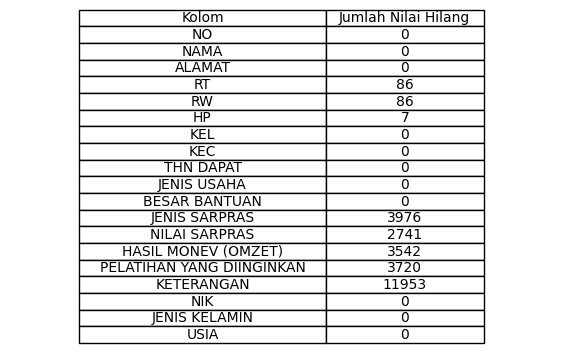

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah nilai hilang per kolom
missing_values = df.isnull().sum()

# Membuat plot
fig, ax = plt.subplots(figsize=(7, 3))

# Menyembunyikan sumbu
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Menampilkan data sebagai tabel
table_data = [["Kolom", "Jumlah Nilai Hilang"]] + list(zip(missing_values.index, missing_values.values))
table = ax.table(cellText=table_data, cellLoc='center', loc='center')

# Menyesuaikan tampilan tabel
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])

plt.show()



In [ ]:
df.isnull().sum()

,0
NO,0
NAMA,0
ALAMAT,0
RT,86
RW,86
HP,7
KEL,0
KEC,0
THN DAPAT,0
JENIS USAHA,0


Drop/Hapus kolom yang tidak digunakan

In [ ]:
df = df.drop(['NO', 'NAMA', 'ALAMAT', 'RT', 'RW', 'HP', 'KEL', 'KEC', 'KETERANGAN', 'NIK'], axis=1)

Isi data kosong pada Kolom Nilai Sarpras dengan Rata-rata

In [ ]:
df['NILAI SARPRAS'] = df['NILAI SARPRAS'].fillna(df['NILAI SARPRAS'].mean())
#mengisi data kosong dengan mean/rata-rata
#digunakan pada data yang bertipe numerik

Isi data kosong pada Kolom Jenis Sarpras, Hasil Monev, Pelatihan yang diinginkan dengan Modus

In [ ]:
df['JENIS SARPRAS'] = df['JENIS SARPRAS'].fillna(df['JENIS SARPRAS'].mode()[0])

df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].fillna(df['HASIL MONEV (OMZET)'].mode()[0])

df['PELATIHAN YANG DIINGINKAN'] = df['PELATIHAN YANG DIINGINKAN'].fillna(df['PELATIHAN YANG DIINGINKAN'].mode()[0])
#mengisi data kosong dengan modus
#hanya digunakan pada data yang bertipe string

Cek Hasil data setelah Preprocessing

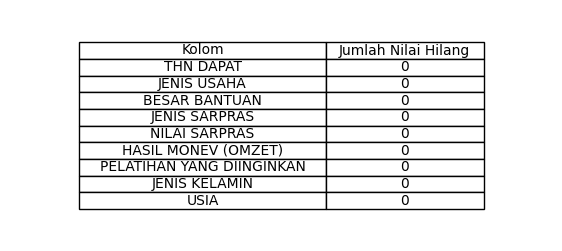

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah nilai hilang per kolom
missing_values = df.isnull().sum()

# Membuat plot
fig, ax = plt.subplots(figsize=(7, 3))

# Menyembunyikan sumbu
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Menampilkan data sebagai tabel
table_data = [["Kolom", "Jumlah Nilai Hilang"]] + list(zip(missing_values.index, missing_values.values))
table = ax.table(cellText=table_data, cellLoc='center', loc='center')

# Menyesuaikan tampilan tabel
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])

plt.show()



In [ ]:
df.isnull().sum()

,0
THN DAPAT,0
JENIS USAHA,0
BESAR BANTUAN,0
JENIS SARPRAS,0
NILAI SARPRAS,0
HASIL MONEV (OMZET),0
PELATIHAN YANG DIINGINKAN,0
JENIS KELAMIN,0
USIA,0


Mengubah huruf kecil pada value kolom

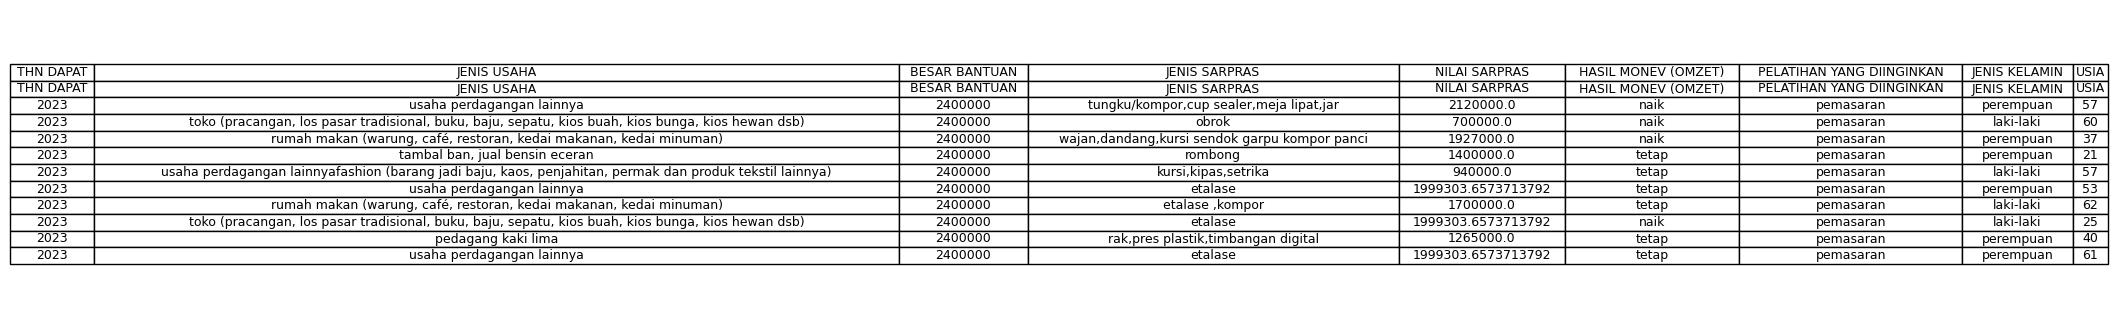

In [ ]:
import matplotlib.pyplot as plt

# Mengubah semua teks di kolom tertentu menjadi huruf kecil
columns_to_lower = ['JENIS SARPRAS', 'JENIS USAHA', 'HASIL MONEV (OMZET)', 'PELATIHAN YANG DIINGINKAN', 'JENIS KELAMIN']
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower())

# Membuat visualisasi tabel
fig, ax = plt.subplots(figsize=(8, 4))

# Menyembunyikan sumbu
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Menampilkan tabel hasil perubahan
table_data = [df.columns.tolist()] + df.head(10).values.tolist()  # Menampilkan 10 baris pertama
table = ax.table(cellText=table_data, colLabels=df.columns, cellLoc='center', loc='center')

# Menyesuaikan tampilan tabel
table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width([i for i in range(len(df.columns))])

plt.show()


In [ ]:
# Mengubah semua teks di kolom tertentu menjadi huruf kecil
columns_to_lower = ['JENIS SARPRAS', 'JENIS USAHA', 'HASIL MONEV (OMZET)', 'PELATIHAN YANG DIINGINKAN', 'JENIS KELAMIN']

# Daftar kolom yang ingin diubah menjadi lowercase
df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower())
print(df)

       THN DAPAT                                        JENIS USAHA  \
0           2023                          usaha perdagangan lainnya   
1           2023  toko (pracangan, los pasar tradisional, buku, ...   
2           2023  rumah makan (warung, café, restoran, kedai mak...   
3           2023                     tambal ban, jual bensin eceran   
4           2023  usaha perdagangan lainnyafashion (barang jadi ...   
...          ...                                                ...   
11988       2022                                makanan dan minuman   
11989       2022                             pedagang rempah-rempah   
11990       2022                                makanan dan minuman   
11991       2022                                               toko   
11992       2022                                makanan dan minuman   

       BESAR BANTUAN                                  JENIS SARPRAS  \
0            2400000        tungku/kompor,cup sealer,meja lipat,jar   
1    

perbaikan penulisan ejaan


In [ ]:
from difflib import get_close_matches

# Fungsi untuk memperbaiki ejaan menggunakan difflib
def perbaiki_ejaan(teks, all_kata):
    if isinstance(teks, str):  # Pastikan teks adalah string
        kata = teks.split()
        kata_perbaikan = []

        for k in kata:
            # Mencari kata terdekat
            matches = get_close_matches(k, all_kata, n=1)
            kata_perbaikan.append(matches[0] if matches else k)  # Ambil kata yang paling sesuai atau kata asli

        return ' '.join(kata_perbaikan)
    return teks  # Kembalikan nilai asli jika bukan string

# Ambil semua kata unik dari kolom 'JENIS SARPRAS'
all_kata = df['JENIS SARPRAS'].unique().tolist()
# Ambil semua kata unik dari kolom 'JENIS USAHA'
#all_kata = df['JENIS USAHA'].unique().tolist()
# Ambil semua kata unik dari kolom 'JENIS PELATIHAN'
#all_kata = df['PELATIHAN YANG DIINGINKAN'].unique().tolist()

# Terapkan fungsi perbaikan ejaan ke kolom "JENIS SARPRAS"
df['JENIS SARPRAS'] = df['JENIS SARPRAS'].apply(lambda teks: perbaiki_ejaan(teks, all_kata))
# Terapkan fungsi perbaikan ejaan ke kolom "JENIS SARPRAS"
#df['JENIS USAHA'] = df['JENIS USAHA'].apply(lambda teks: perbaiki_ejaan(teks, all_kata))
# Terapkan fungsi perbaikan ejaan ke kolom "JENIS SARPRAS"
#df['PELATIHAN YANG DIINGINKAN'] = df['PELATIHAN YANG DIINGINKAN'].apply(lambda teks: perbaiki_ejaan(teks, all_kata))

# Tampilkan hasil
print(df[['JENIS SARPRAS']])
# Tampilkan hasil
#print(df[['JENIS USAHA']])
# Tampilkan hasil
#print(df[['PELATIHAN YANG DIINGINKAN']])


                                          JENIS SARPRAS
0      tabung gas, kompor, cup sealer, meja impact apr,
1                                                 obrok
2              wajan,meja,kursi seng lampu kompor panci
3                                               rombong
4                                   kursi,kipas,setrika
...                                                 ...
11988                                           etalase
11989                                           etalase
11990                                           etalase
11991                                           etalase
11992                                           etalase

[11993 rows x 1 columns]


kode untuk memisahkan kolom JENIS SARPRAS yang terdapat tanda koma

In [ ]:
# Menormalkan tanda koma dengan spasi tunggal setelah koma
#(menghapus spasi tambahan yang tidak diinginkan)
df['JENIS SARPRAS'] = df['JENIS SARPRAS'].str.replace(r'\s*,\s*', ', ', regex=True)

# Memisahkan kolom 'JENIS SARPRAS' berdasarkan tanda koma (,)
df_split = df['JENIS SARPRAS'].str.split(',', expand=True)

print(df_split)


                  0            1                                 2     3   \
0      tungku/kompor   cup sealer                        meja lipat   jar   
1              obrok         None                              None  None   
2              wajan      dandang   kursi sendok garpu kompor panci  None   
3            rombong         None                              None  None   
4              kursi        kipas                           setrika  None   
...              ...          ...                               ...   ...   
11988        etalase         None                              None  None   
11989        etalase         None                              None  None   
11990        etalase         None                              None  None   
11991        etalase         None                              None  None   
11992        etalase         None                              None  None   

         4     5     6     7     8     9     10    11    12    13  
0      

kode untuk memisahkan kolom JENIS USAHA yang terdapat tanda koma

In [ ]:
# Menghapus nilai yang berada di dalam tanda kurung
#beserta tanda kurung itu sendiri
df['JENIS USAHA'] = df['JENIS USAHA'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()

# Menormalkan tanda koma dengan spasi tunggal setelah koma
#(menghapus spasi tambahan yang tidak diinginkan)
df['JENIS USAHA'] = df['JENIS USAHA'].str.replace(r'\s*,\s*', ', ', regex=True)

# Memisahkan kolom 'JENIS USAHA' berdasarkan tanda koma (,)
df_split = df['JENIS USAHA'].str.split(',', expand=True)

print(df_split)


                                     0                    1     2     3   \
0             usaha perdagangan lainnya                 None  None  None   
1                                  toko                 None  None  None   
2                           rumah makan                 None  None  None   
3                            tambal ban   jual bensin eceran  None  None   
4      usaha perdagangan lainnyafashion                 None  None  None   
...                                 ...                  ...   ...   ...   
11988               makanan dan minuman                 None  None  None   
11989            pedagang rempah-rempah                 None  None  None   
11990               makanan dan minuman                 None  None  None   
11991                              toko                 None  None  None   
11992               makanan dan minuman                 None  None  None   

         4     5     6     7     8     9     10  
0      None  None  None  None  None  

kode untuk memisahkan kolom PELATIHAN yang terdapat tanda koma

In [ ]:
# Menormalkan tanda koma dengan spasi tunggal setelah koma
#(menghapus spasi tambahan yang tidak diinginkan)
df['PELATIHAN YANG DIINGINKAN'] = df['PELATIHAN YANG DIINGINKAN'].str.replace(r'\s*,\s*', ', ', regex=True)

# Memisahkan kolom 'PELATIHAN YANG DIINGINKAN' berdasarkan tanda koma (,)
df_split = df['PELATIHAN YANG DIINGINKAN'].str.split(',', expand=True)

print(df_split)


               0     1     2
0      pemasaran  None  None
1      pemasaran  None  None
2      pemasaran  None  None
3      pemasaran  None  None
4      pemasaran  None  None
...          ...   ...   ...
11988  pemasaran  None  None
11989  pemasaran  None  None
11990  pemasaran  None  None
11991  pemasaran  None  None
11992  pemasaran  None  None

[11993 rows x 3 columns]


In [ ]:
# Menghapus spasi di awal dan akhir setiap elemen
df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].str.strip()

# Menormalkan tanda koma dengan spasi tunggal setelah koma
df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].str.replace(r'\s*,\s*', ' ,', regex=True)

# Menampilkan hasil
print(df['HASIL MONEV (OMZET)'])


0         naik
1         naik
2         naik
3        tetap
4        tetap
         ...  
11988    tetap
11989    tetap
11990    tetap
11991    tetap
11992    tetap
Name: HASIL MONEV (OMZET), Length: 11993, dtype: object


perbaikan ejaan kata

mencari kata unik pada kolom

In [ ]:
# Mencari kata unik di kolom "PELATIHAN YANG DIINGINKAN"
unique_values = df['PELATIHAN YANG DIINGINKAN'].unique()

# Menampilkan hasil
print("Kata unik dalam kolom 'PELATIHAN YANG DIINGINKAN':")
print(unique_values)

Kata unik dalam kolom 'PELATIHAN YANG DIINGINKAN':
['pemasaran' 'manajemen keuangan' 'kualitas produksi'
 'manajemen keuangan, pemasaran, kualitas produksi' 'produksi'
 'pemasaran, kualitas produksi' 'manajemen keuangan, pemasaran' 'keuangan'
 'pemasaran & produksi' 'manajemen keuangan, kualitas produksi'
 'pemasaran & keuangan' 'pemasaran, keuangan, & produksi'
 'keuangan, pemasaran' 'pemasaran, manajemen keuangan'
 'pemasaran, manajemen keuangan, kualitas produksi'
 'manajemen keuangan, kualitas produksi, pemasaran'
 'kualitas produksi, pemasaran' 'pemasaran, produksi'
 'kualitas produksi, manajemen keuangan, pemasaran' 'produksi, pemasaran'
 'pemasaran, kualitas produksi, manajemen keuangan' 'pemasaran, keuangan'
 'pemasran' 'produksi, keuangan' 'keuangan & produksi'
 'keuangan, produksi' 'produksi, pemasaran ' 'pemasaran '
 'kualitas produksi, pemasaran, manajemen keuangan'
 'pemasaran, keuangan, produksi' 'kualitas produksi, manajemen keuangan']


In [ ]:
import pandas as pd

# Daftar data yang diberikan
data = [
    'pemasaran', 'manajemen keuangan', 'kualitas produksi',
    'manajemen keuangan, pemasaran, kualitas produksi', 'produksi',
    'pemasaran, kualitas produksi', 'manajemen keuangan, pemasaran', 'keuangan',
    'pemasaran & produksi', 'manajemen keuangan, kualitas produksi',
    'pemasaran & keuangan', 'pemasaran, keuangan, & produksi',
    'keuangan, pemasaran', 'pemasaran, manajemen keuangan',
    'pemasaran, manajemen keuangan, kualitas produksi',
    'manajemen keuangan, kualitas produksi, pemasaran',
    'kualitas produksi, pemasaran', 'pemasaran, produksi',
    'kualitas produksi, manajemen keuangan, pemasaran', 'produksi, pemasaran',
    'pemasaran, kualitas produksi, manajemen keuangan', 'pemasaran, keuangan',
    'pemasran', 'produksi, keuangan', 'keuangan & produksi',
    'keuangan, produksi', 'produksi, pemasaran ', 'pemasaran ',
    'kualitas produksi, pemasaran, manajemen keuangan',
    'pemasaran, keuangan, produksi', 'kualitas produksi, manajemen keuangan'
]

# Membuat DataFrame dari data
df = pd.DataFrame(data, columns=['PELATIHAN YANG DIINGINKAN'])

# Membuat kategori dari data
# Menghapus spasi ekstra dan karakter '&'
df['KATEGORI'] = df['PELATIHAN YANG DIINGINKAN'].str.replace('&', ',', regex=False).str.strip()

# Mengonversi menjadi daftar kategori unik
categories = df['KATEGORI'].str.split(',').explode().str.strip().unique()

# Menampilkan kategori unik
print("Kategori unik dari data:")
print(categories)

# Menampilkan DataFrame dengan kategori
print("\nDataFrame dengan kategori:")
print(df)


In [ ]:
# Mengambil kolom "HASIL MONEV (OMZET)" tanpa duplikat
unique_text = df['HASIL MONEV (OMZET)'].drop_duplicates()

# Menyimpan kata-kata unik dari setiap baris
unique_words = set()
for text in unique_text:
    words = str(text).split()  # Menggunakan split untuk memisahkan kata per baris
    unique_words.update(words)  # Menambahkan kata ke dalam set unik

# Menampilkan kata-kata unik
print(unique_words)

{'naik', 'mundur', 'tutup', 'tetap', 'turun', 'meninggal'}


In [ ]:
# Mengambil kolom "HASIL MONEV (OMZET)" tanpa duplikat
unique_text = df['HASIL MONEV (OMZET)']

# Menyimpan kata-kata unik dari setiap baris
unique_words = set()
for text in unique_text:
    words = str(text).split()  # Menggunakan split untuk memisahkan kata per baris
    unique_words.update(words)  # Menambahkan kata ke dalam set unik

# Menampilkan kata-kata unik
print(unique_words)

{'naik', 'mundur', 'tutup', 'tetap', 'turun', 'meninggal'}


In [ ]:
# Mengambil kolom "HASIL MONEV (OMZET)" tanpa duplikat
unique_text = df['HASIL MONEV (OMZET)'].drop_duplicates()

# Menyimpan kata-kata unik dari setiap baris
unique_words = set()
for text in unique_text:
    words = str(text).split()  # Menggunakan split untuk memisahkan kata per baris
    unique_words.update(words)  # Menambahkan kata ke dalam set unik

# Menampilkan kata-kata unik
print(unique_words)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Misalnya, target 'HASIL MONEV (OMZET)' adalah kategorikal
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi target kategorikal menjadi numerik
y_encoded = label_encoder.fit_transform(df['HASIL MONEV (OMZET)'])

# Menampilkan label numerik yang dihasilkan
print("Label Numerik:", y_encoded)

# Menampilkan kelas kategorikal asli yang sesuai dengan label numerik
print("Kelas Kategorikal:", label_encoder.classes_)

# Jika ingin mengonversi label numerik kembali ke label kategorikal asli
y_decoded = label_encoder.inverse_transform(y_encoded)
print("Label Kategorikal Kembali:", y_decoded)


Label Numerik: [2 2 2 ... 3 3 3]
Kelas Kategorikal: ['meninggal' 'mundur' 'naik' 'tetap' 'turun' 'tutup']
Label Kategorikal Kembali: ['naik' 'naik' 'naik' ... 'tetap' 'tetap' 'tetap']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Misalnya, target 'HASIL MONEV (OMZET)' adalah kategorikal
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi target kategorikal menjadi numerik
y_encoded = label_encoder.fit_transform(df['HASIL MONEV (OMZET)'])

# Menampilkan label numerik yang dihasilkan
print("Label Numerik:", y_encoded)

# Menampilkan kelas kategorikal asli yang sesuai dengan label numerik
print("Kelas Kategorikal:", label_encoder.classes_)

# Jika ingin mengonversi label numerik kembali ke label kategorikal asli
y_decoded = label_encoder.inverse_transform(y_encoded)
print("Label Kategorikal Kembali:", y_decoded)


In [ ]:
# Mengambil kolom "JENIS USAHA" tanpa duplikat
unique_text = df['JENIS USAHA'].drop_duplicates()

# Menyimpan kata-kata unik dari setiap baris
unique_words = set()
for text in unique_text:
    words = str(text).split()  # Menggunakan split untuk memisahkan kata per baris
    unique_words.update(words)  # Menambahkan kata ke dalam set unik

# Menampilkan kata-kata unik
print(unique_words)

In [ ]:
# Mengambil kolom "JENIS SARPRAS" tanpa duplikat
unique_text = df['JENIS SARPRAS'].drop_duplicates()

# Menyimpan kata-kata unik dari setiap baris
unique_words = set()
for text in unique_text:
    words = str(text).split()  # Menggunakan split untuk memisahkan kata per baris
    unique_words.update(words)  # Menambahkan kata ke dalam set unik

# Menampilkan kata-kata unik
print(unique_words)

In [ ]:
print(df)

df.to_csv('hasil_preprocessing.csv', index=False)

# **EDA**

Import library untuk EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

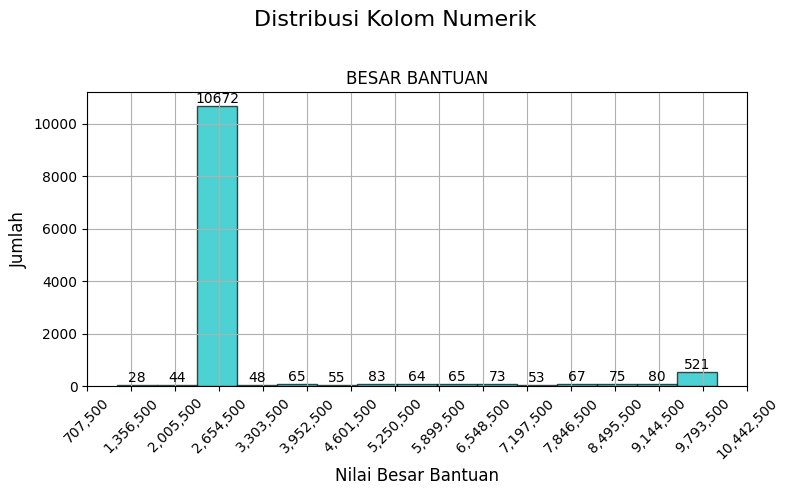

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Melihat distribusi kolom numerik seperti 'BESAR BANTUAN'
numeric_cols = ['BESAR BANTUAN']
axes = df[numeric_cols].hist(bins=15, figsize=(8, 5), color='c', edgecolor='black', alpha=0.7)

# Tambahkan keterangan sumbu x dan y serta grid
for ax in axes.flatten():  # Iterasi melalui semua subplot
    ax.set_xlabel('Nilai Besar Bantuan', fontsize=12)  # Label untuk sumbu X
    ax.set_ylabel('Jumlah', fontsize=12)  # Label untuk sumbu Y

    # Menampilkan angka di atas setiap batang
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Hanya menampilkan label jika ada data
            ax.annotate(f'{int(height)}',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10, color='black')

    # Menyesuaikan tick label sumbu X agar lebih mudah dibaca
    bin_edges = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], len(ax.patches) + 1)
    ax.set_xticks(bin_edges)
    ax.set_xticklabels([f'{int(edge):,}' for edge in bin_edges], rotation=45)

# Judul umum untuk seluruh plot
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Hindari overlap dengan judul
plt.show()


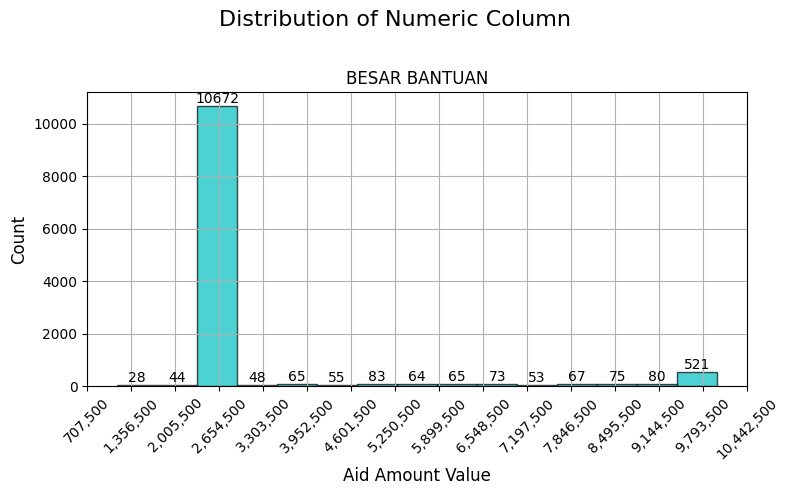

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# View the distribution of the numeric column like 'BESAR BANTUAN'
numeric_cols = ['BESAR BANTUAN']
axes = df[numeric_cols].hist(bins=15, figsize=(8, 5), color='c', edgecolor='black', alpha=0.7)

# Add x and y axis labels, and grid
for ax in axes.flatten():  # Iterate through all subplots
    ax.set_xlabel('Aid Amount Value', fontsize=12)  # X-axis label
    ax.set_ylabel('Count', fontsize=12)  # Y-axis label

    # Display numbers above each bar
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only show labels if data exists
            ax.annotate(f'{int(height)}',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10, color='black')

    # Adjust X-axis tick labels for better readability
    bin_edges = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], len(ax.patches) + 1)
    ax.set_xticks(bin_edges)
    ax.set_xticklabels([f'{int(edge):,}' for edge in bin_edges], rotation=45)

# General title for all plots
plt.suptitle('Distribution of Numeric Column', fontsize=16)

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent overlap with title
plt.show()


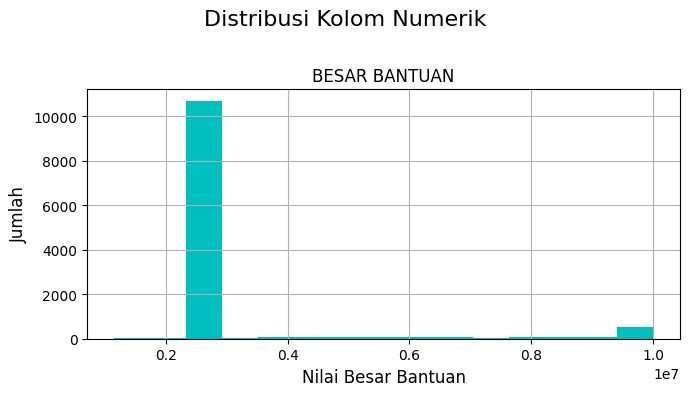

In [ ]:
# Melihat distribusi kolom numerik seperti 'BESAR BANTUAN'
numeric_cols = ['BESAR BANTUAN']
axes = df[numeric_cols].hist(bins=15, figsize=(7, 4), color='c')

# Tambahkan keterangan sumbu x dan y
for ax in axes.flatten():  # Iterasi melalui semua subplot
    ax.set_xlabel('Nilai Besar Bantuan', fontsize=12)  # Label untuk sumbu X
    ax.set_ylabel('Jumlah', fontsize=12)  # Label untuk sumbu Y

# Judul umum untuk seluruh plot
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Hindari overlap dengan judul
plt.show()


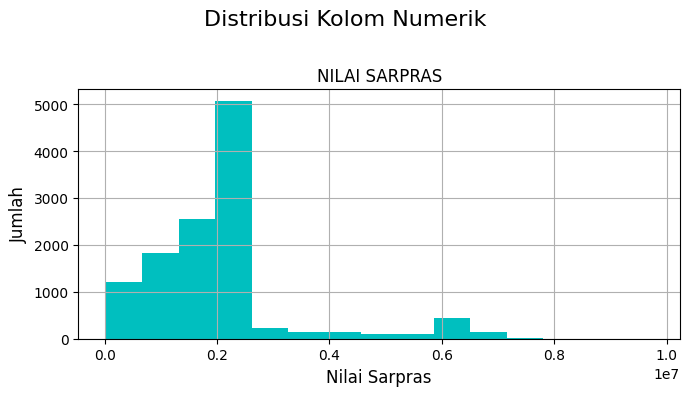

In [ ]:
# Melihat distribusi kolom numerik seperti 'BESAR BANTUAN'
numeric_cols = ['NILAI SARPRAS']
axes = df[numeric_cols].hist(bins=15, figsize=(7, 4), color='c')

# Tambahkan keterangan sumbu x dan y
for ax in axes.flatten():  # Iterasi melalui semua subplot
    ax.set_xlabel('Nilai Sarpras', fontsize=12)  # Label untuk sumbu X
    ax.set_ylabel('Jumlah', fontsize=12)  # Label untuk sumbu Y

# Judul umum untuk seluruh plot
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Hindari overlap dengan judul
plt.show()


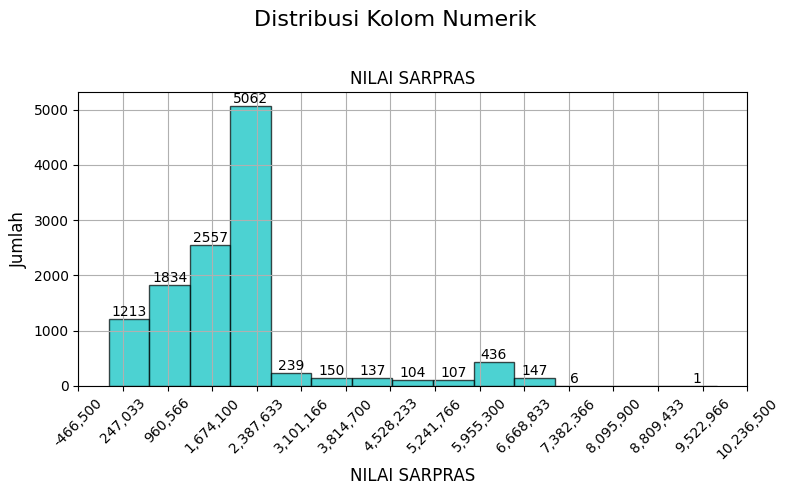

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Melihat distribusi kolom numerik seperti 'NILAI SARPRAS'
numeric_cols = ['NILAI SARPRAS']
axes = df[numeric_cols].hist(bins=15, figsize=(8, 5), color='c', edgecolor='black', alpha=0.7)

# Tambahkan keterangan sumbu x dan y serta grid
for ax in axes.flatten():  # Iterasi melalui semua subplot
    ax.set_xlabel('NILAI SARPRAS', fontsize=12)  # Label untuk sumbu X
    ax.set_ylabel('Jumlah', fontsize=12)  # Label untuk sumbu Y

    # Menampilkan angka di atas setiap batang
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Hanya menampilkan label jika ada data
            ax.annotate(f'{int(height)}',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10, color='black')

    # Menyesuaikan tick label sumbu X agar lebih mudah dibaca
    bin_edges = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], len(ax.patches) + 1)
    ax.set_xticks(bin_edges)
    ax.set_xticklabels([f'{int(edge):,}' for edge in bin_edges], rotation=45)

# Judul umum untuk seluruh plot
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Hindari overlap dengan judul
plt.show()


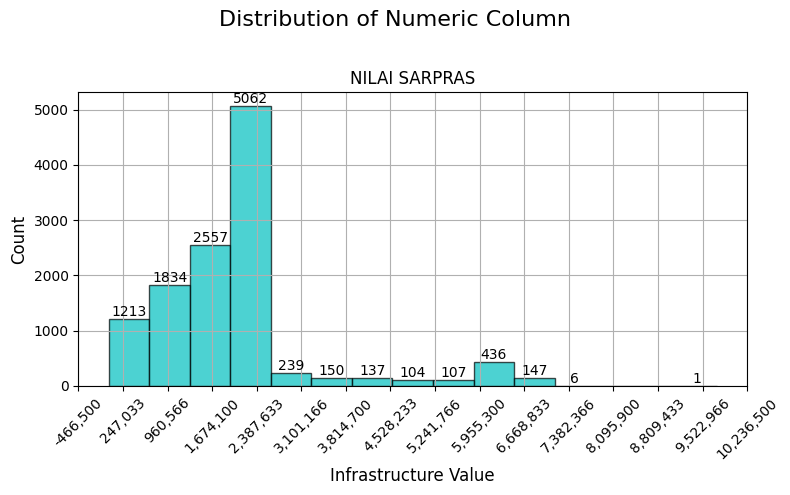

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# View the distribution of the numeric column like 'NILAI SARPRAS'
numeric_cols = ['NILAI SARPRAS']
axes = df[numeric_cols].hist(bins=15, figsize=(8, 5), color='c', edgecolor='black', alpha=0.7)

# Add x and y axis labels, and grid
for ax in axes.flatten():  # Iterate through all subplots
    ax.set_xlabel('Infrastructure Value', fontsize=12)  # X-axis label
    ax.set_ylabel('Count', fontsize=12)  # Y-axis label

    # Display numbers above each bar
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Only show labels if data exists
            ax.annotate(f'{int(height)}',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10, color='black')

    # Adjust X-axis tick labels for better readability
    bin_edges = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], len(ax.patches) + 1)
    ax.set_xticks(bin_edges)
    ax.set_xticklabels([f'{int(edge):,}' for edge in bin_edges], rotation=45)

# General title for all plots
plt.suptitle('Distribution of Numeric Column', fontsize=16)

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent overlap with title
plt.show()


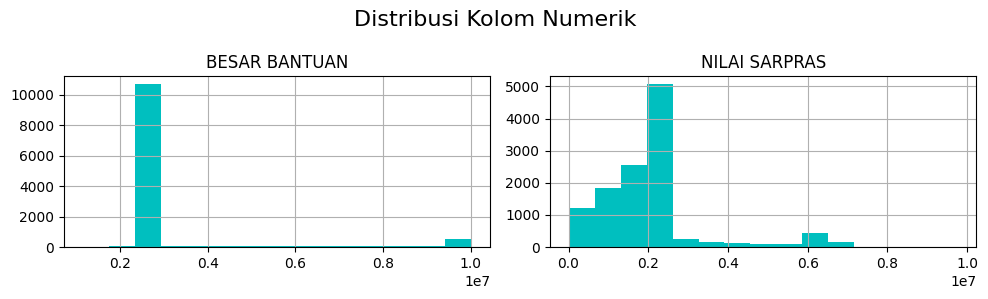

In [ ]:
# Melihat distribusi kolom numerik seperti 'THN DAPAT', 'BESAR BANTUAN', 'NILAI SARPRAS', dan 'HASIL MONEV (OMZET)'
numeric_cols = ['BESAR BANTUAN', 'NILAI SARPRAS']
df[numeric_cols].hist(bins=15, figsize=(10, 3), color='c')
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)
plt.tight_layout()
plt.show()

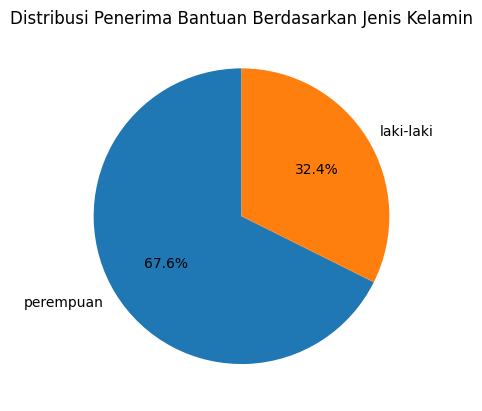

In [ ]:
df['JENIS KELAMIN'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Penerima Bantuan Berdasarkan Jenis Kelamin')
plt.ylabel('')  # Menghilangkan label y agar pie chart lebih bersih
plt.show()

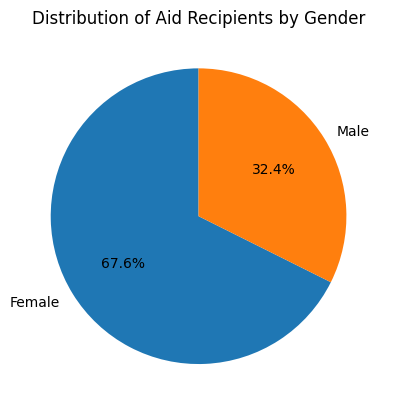

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping kategori dari bahasa Indonesia ke bahasa Inggris menggunakan map()
mapping_gender = {
    'Laki-laki': 'Male',
    'Perempuan': 'Female'
}
df['JENIS KELAMIN'] = df['JENIS KELAMIN'].map(mapping_gender)

# Hitung jumlah setiap kategori setelah perubahan
gender_counts = df['JENIS KELAMIN'].value_counts()

# Visualisasi pie chart dengan label bahasa Inggris
gender_counts.plot(kind='pie', labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Aid Recipients by Gender')
plt.ylabel('')  # Menghilangkan label y agar pie chart lebih bersih
plt.show()


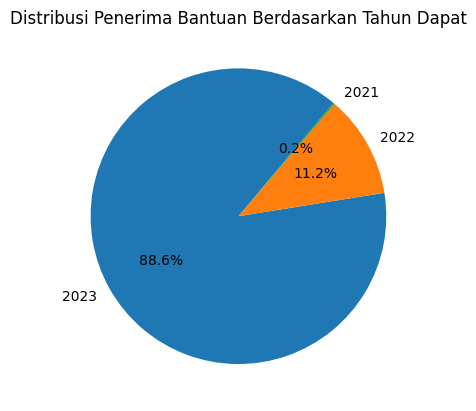

In [ ]:
df['THN DAPAT'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=50)
plt.title('Distribusi Penerima Bantuan Berdasarkan Tahun Dapat')
plt.ylabel('')  # Menghilangkan label y agar pie chart lebih bersih
plt.show()

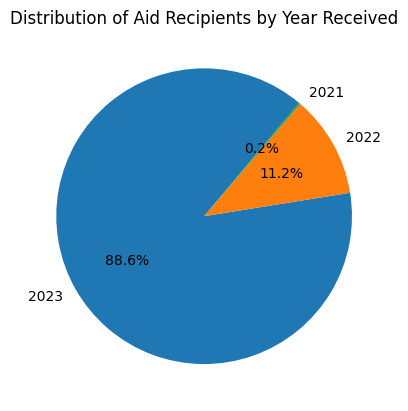

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah penerima berdasarkan tahun
year_counts = df['THN DAPAT'].value_counts()

# Visualisasi pie chart dengan label bahasa Inggris
year_counts.plot(kind='pie', labels=year_counts.index, autopct='%1.1f%%', startangle=50)

# Ubah judul menjadi bahasa Inggris
plt.title('Distribution of Aid Recipients by Year Received')
plt.ylabel('')  # Menghilangkan label y agar pie chart lebih bersih
plt.show()


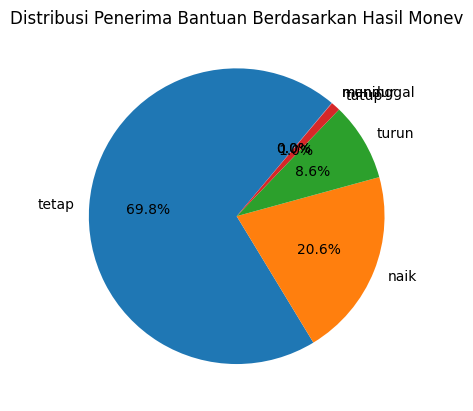

In [ ]:
df['HASIL MONEV (OMZET)'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=50)
plt.title('Distribusi Penerima Bantuan Berdasarkan Hasil Monev')
plt.ylabel('')  # Menghilangkan label y agar pie chart lebih bersih
plt.show()

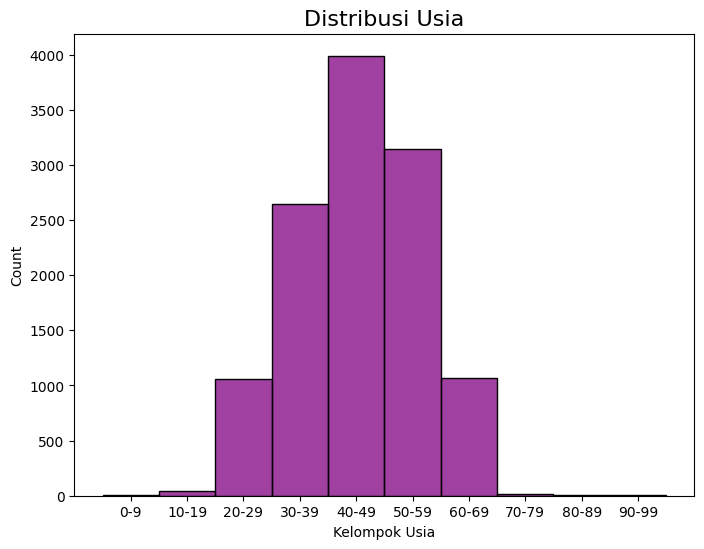

In [ ]:
bins = np.arange(0, 101, 10)  # Rentang usia dari 0 hingga 100 tahun dengan interval 10 tahun
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Label untuk setiap kelompok usia, misalnya "0-9", "10-19", dll.

# Mengelompokkan usia ke dalam kategori
df['Kelompok Usia'] = pd.cut(df['USIA'].clip(upper=100), bins=bins, labels=labels, right=False)

# Analisis distribusi usia
plt.figure(figsize=(8, 6))
sns.histplot(df['Kelompok Usia'], bins=10, color='purple')
plt.title('Distribusi Usia', fontsize=16)
plt.show()

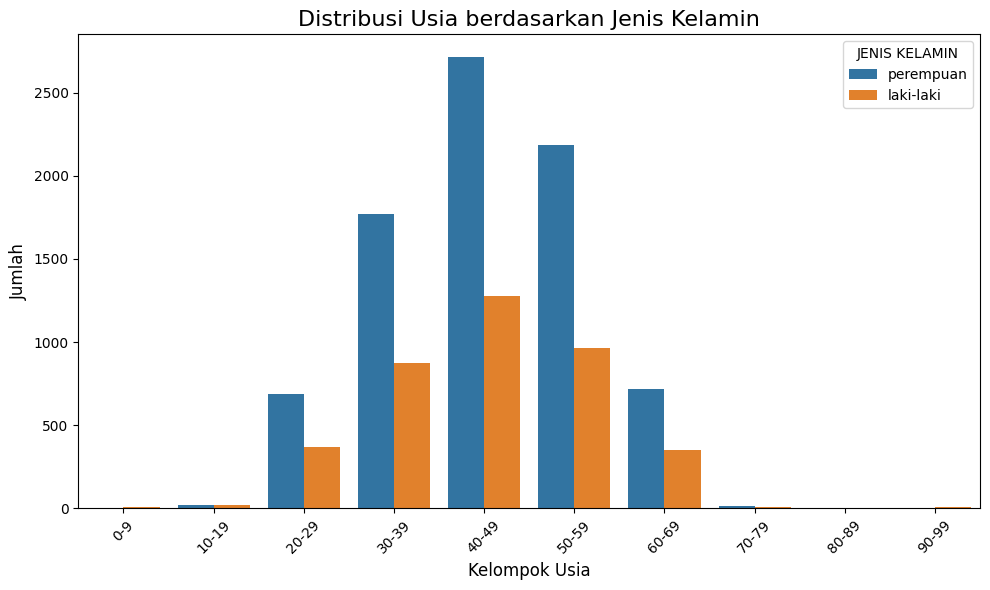

In [ ]:
import numpy as np

# Membuat kategori usia dengan rentang 10 tahun, dibatasi hingga 100 tahun
bins = np.arange(0, 101, 10)  # Rentang usia dari 0 hingga 100 tahun dengan interval 10 tahun
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Label untuk setiap kelompok usia, misalnya "0-9", "10-19", dll.

# Mengelompokkan usia ke dalam kategori
df['Kelompok Usia'] = pd.cut(df['USIA'].clip(upper=100), bins=bins, labels=labels, right=False)

# Visualisasi distribusi usia berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.countplot(x='Kelompok Usia', hue='JENIS KELAMIN', data=df)
plt.title('Distribusi Usia berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)  # Memutar label pada sumbu X
plt.tight_layout()
plt.show()


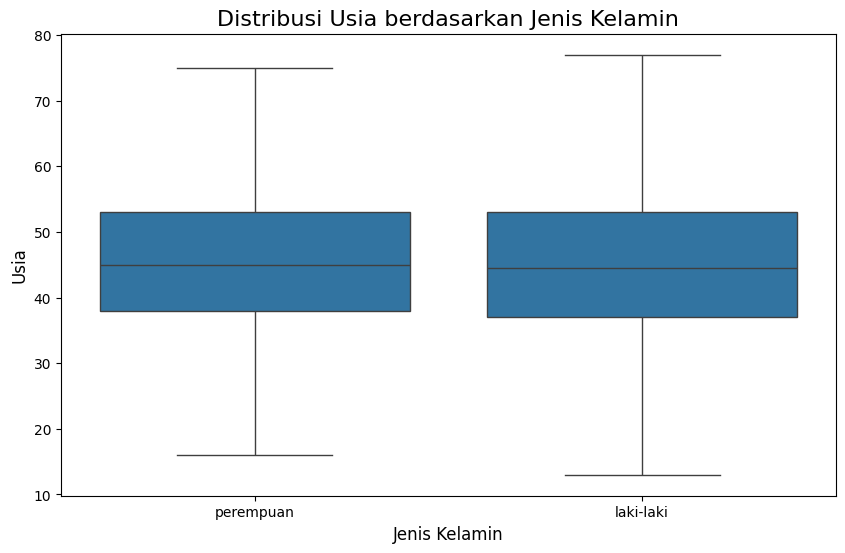

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='JENIS KELAMIN', y='USIA', data=df, showfliers=False)  # Menyembunyikan pencilan jika diinginkan
plt.title('Distribusi Usia berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Usia', fontsize=12)
plt.show()

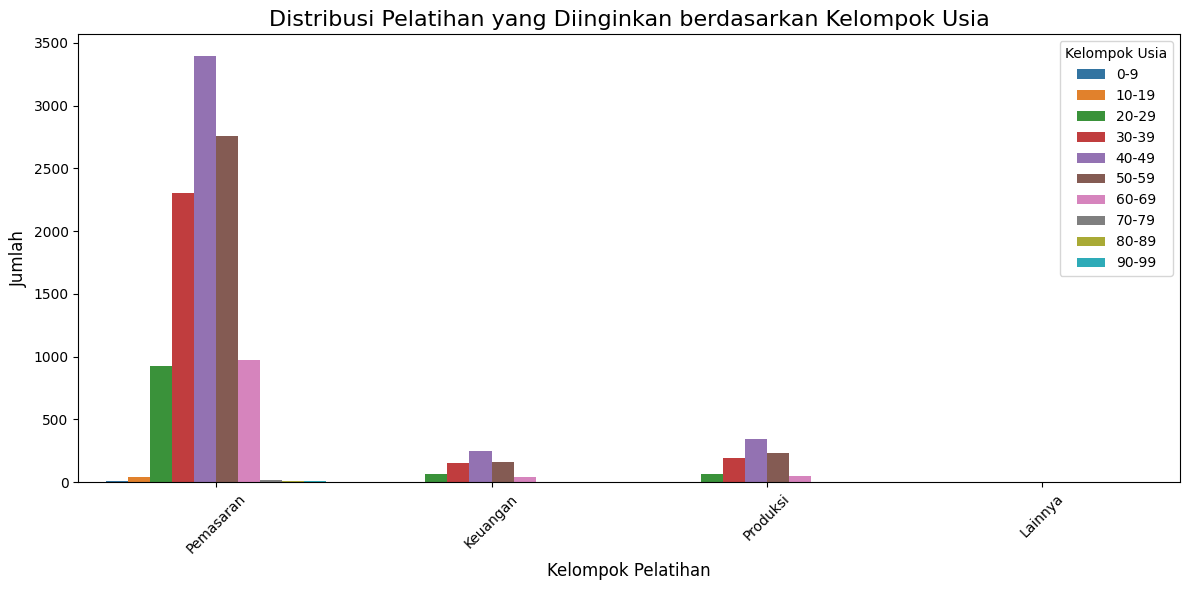

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh DataFrame
# df = pd.read_csv('data_banmot.csv')  # Uncomment this line to read your actual data

# Fungsi untuk mengelompokkan pelatihan
def kelompok_pelatihan(pelatihan):
    if 'pemasaran' in pelatihan.lower():
        return 'Pemasaran'
    elif 'keuangan' in pelatihan.lower():
        return 'Keuangan'
    elif 'produksi' in pelatihan.lower():
        return 'Produksi'
    elif 'kualitas' in pelatihan.lower():
        return 'Kualitas Produksi'
    elif 'manajemen' in pelatihan.lower():
        return 'Manajemen Keuangan'
    else:
        return 'Lainnya'

# Menerapkan fungsi pengelompokan ke kolom PELATIHAN YANG DIINGINKAN
df['Kelompok Pelatihan'] = df['PELATIHAN YANG DIINGINKAN'].apply(kelompok_pelatihan)

# Membuat kategori usia dengan rentang 10 tahun, dibatasi hingga 100 tahun
bins = np.arange(0, 101, 10)  # Rentang usia dari 0 hingga 100 tahun dengan interval 10 tahun
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Label untuk setiap kelompok usia

# Mengelompokkan usia ke dalam kategori
df['Kelompok Usia'] = pd.cut(df['USIA'].clip(upper=100), bins=bins, labels=labels, right=False)

# Visualisasi distribusi pelatihan yang diinginkan berdasarkan kelompok usia
plt.figure(figsize=(12, 6))
sns.countplot(x='Kelompok Pelatihan', hue='Kelompok Usia', data=df)
plt.title('Distribusi Pelatihan yang Diinginkan berdasarkan Kelompok Usia', fontsize=16)
plt.xlabel('Kelompok Pelatihan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)  # Memutar label pada sumbu X agar lebih terbaca
plt.tight_layout()
plt.show()



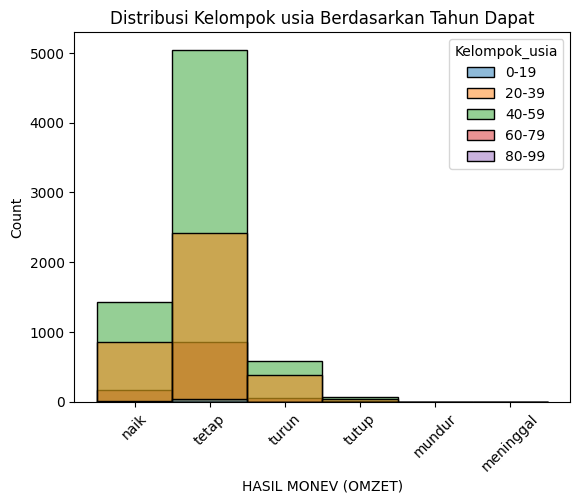

In [ ]:
# Membuat kategori usia per 20 tahun
df['Kelompok_usia'] = pd.cut(df['USIA'], bins=range(0, 101, 20), right=False, labels=['0-19', '20-39', '40-59', '60-79', '80-99'])

sns.histplot(data=df, x='HASIL MONEV (OMZET)', hue='Kelompok_usia')
plt.title('Distribusi Kelompok usia Berdasarkan Tahun Dapat')
plt.xticks(rotation=45)
plt.show()

pada tahun 2023 kelompok usia 40-59 tahun lebih banyak menerima bantuan modal

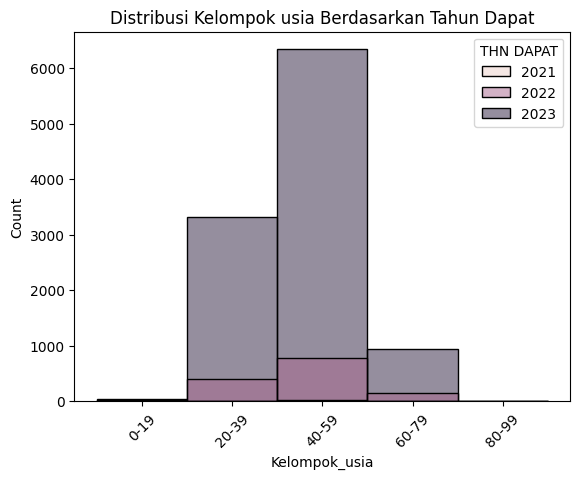

In [ ]:
# Membuat kategori usia per 20 tahun
df['Kelompok_usia'] = pd.cut(df['USIA'], bins=range(0, 101, 20), right=False, labels=['0-19', '20-39', '40-59', '60-79', '80-99'])

sns.histplot(data=df, x='Kelompok_usia', hue='THN DAPAT')
plt.title('Distribusi Kelompok usia Berdasarkan Tahun Dapat')
plt.xticks(rotation=45)
plt.show()

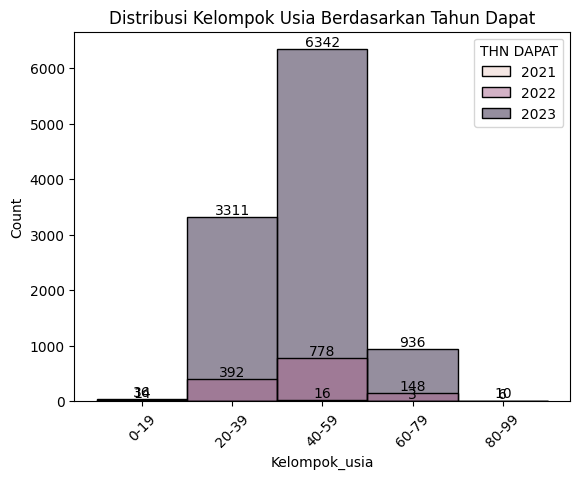

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat kategori usia per 20 tahun
df['Kelompok_usia'] = pd.cut(df['USIA'], bins=range(0, 101, 20), right=False, labels=['0-19', '20-39', '40-59', '60-79', '80-99'])

# Membuat plot
ax = sns.histplot(data=df, x='Kelompok_usia', hue='THN DAPAT')

# Menambahkan jumlah data di atas setiap batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Hanya tampilkan jika ada data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Menyesuaikan tampilan
plt.title('Distribusi Kelompok Usia Berdasarkan Tahun Dapat')
plt.xticks(rotation=45)
plt.show()


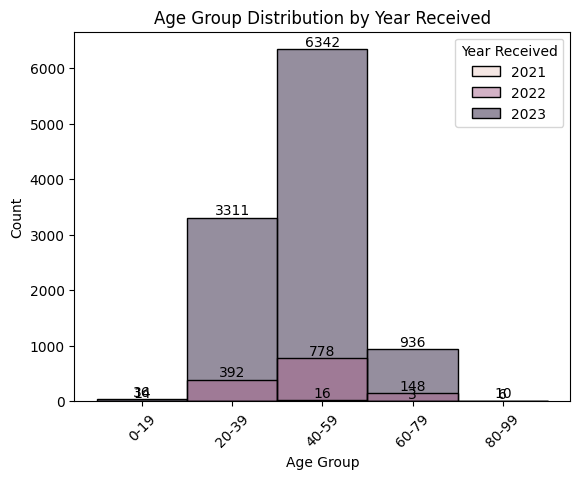

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age categories per 20 years
df['Age_Group'] = pd.cut(df['USIA'], bins=range(0, 101, 20), right=False, labels=['0-19', '20-39', '40-59', '60-79', '80-99'])

df.rename(columns={'THN DAPAT': 'Year Received'}, inplace=True)

# Create plot
ax = sns.histplot(data=df, x='Age Group', hue='Year Received')

# Add data count above each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only display if there is data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Adjust display
plt.title('Age Group Distribution by Year Received')
plt.xticks(rotation=45)
plt.show()


<ipython-input-134-87d62e3275cb>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year Received', loc='upper right')


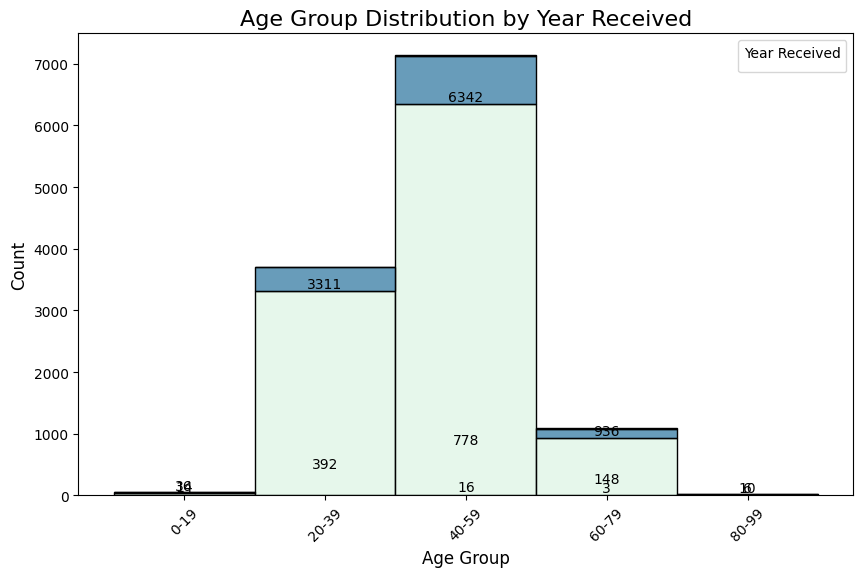

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat kategori usia per 20 tahun dalam bahasa Inggris
df['Age Group'] = pd.cut(df['USIA'], bins=range(0, 101, 20), right=False, labels=['0-19', '20-39', '40-59', '60-79', '80-99'])

# Mengubah "THN DAPAT" ke bahasa Inggris
df['Year Received'] = df['THN DAPAT']

# Membuat plot dengan warna tetap seperti aslinya
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Age Group', hue='Year Received', multiple='stack', palette='mako')

# Menambahkan jumlah data di atas setiap batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Hanya tampilkan jika ada data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Menyesuaikan tampilan
plt.title('Age Group Distribution by Year Received', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Year Received', loc='upper right')
plt.show()


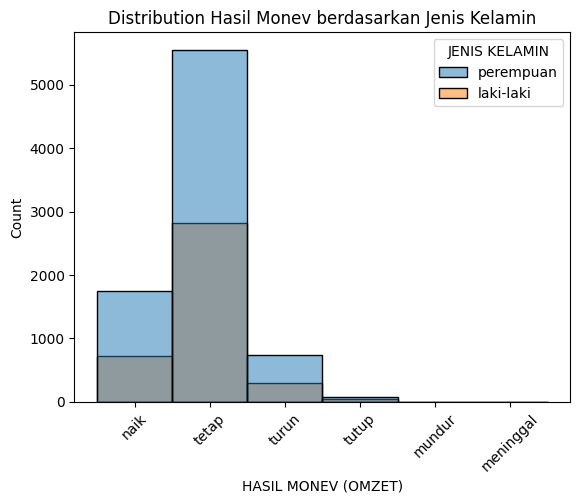

In [ ]:
sns.histplot(data=df, x='HASIL MONEV (OMZET)', hue='JENIS KELAMIN')
plt.title('Distribution Hasil Monev berdasarkan Jenis Kelamin')
plt.xticks(rotation=45)
plt.show()

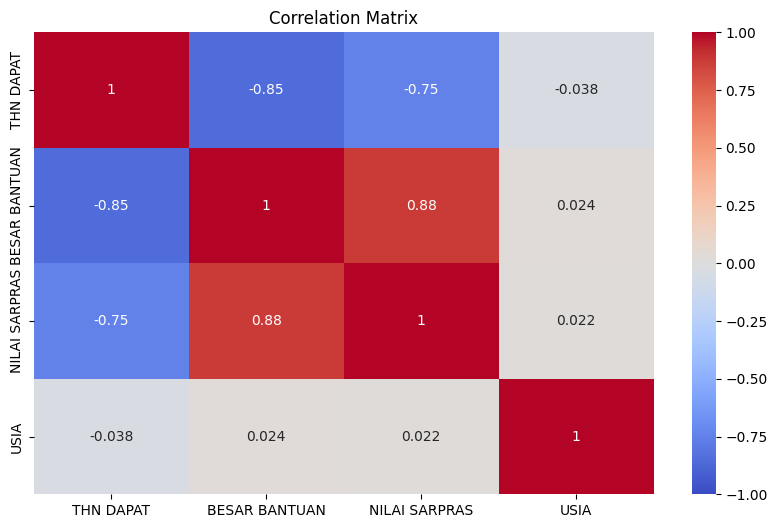

In [ ]:
# Misalkan df adalah DataFrame Anda
# Memilih hanya kolom numerik untuk menghitung korelasi
corr_matrix = df.select_dtypes(include=['number']).corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))  # Ukuran heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

       BESAR BANTUAN  NILAI SARPRAS          USIA
count   1.199300e+04   1.199300e+04  11993.000000
mean    2.962094e+06   1.999304e+06     45.039606
std     1.815827e+06   1.327566e+06     20.938982
min     1.150000e+06   2.000000e+04      1.000000
25%     2.400000e+06   1.300000e+06     37.000000
50%     2.400000e+06   1.999304e+06     45.000000
75%     2.400000e+06   2.099500e+06     53.000000
max     1.000000e+07   9.750000e+06   2003.000000


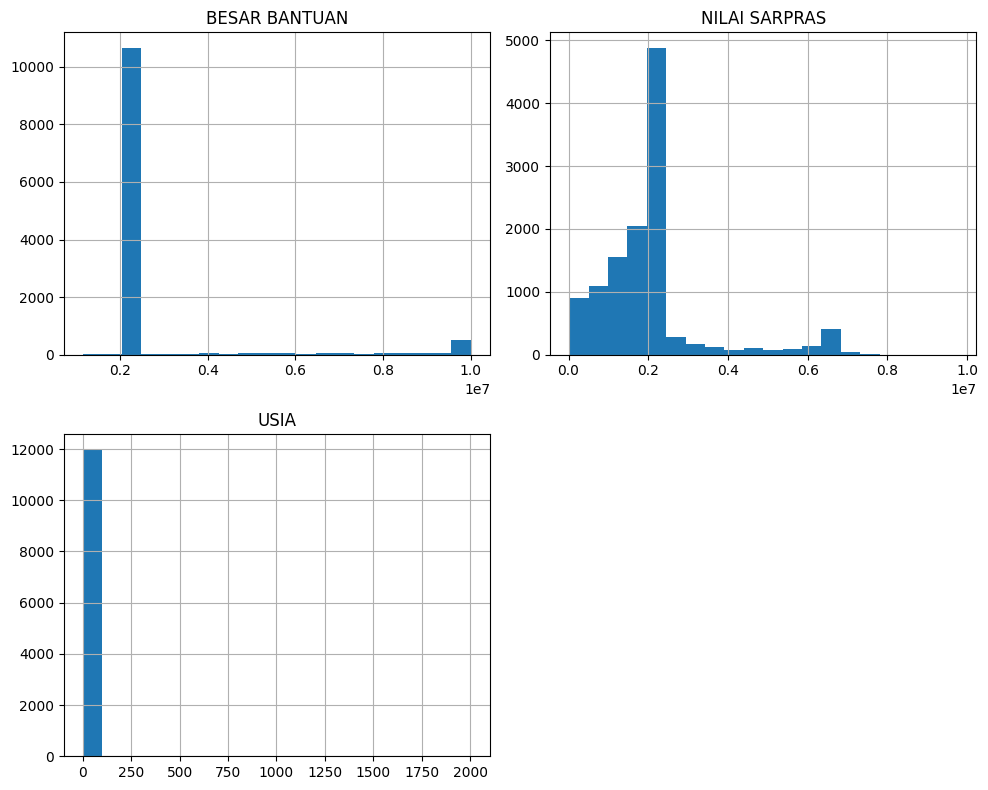

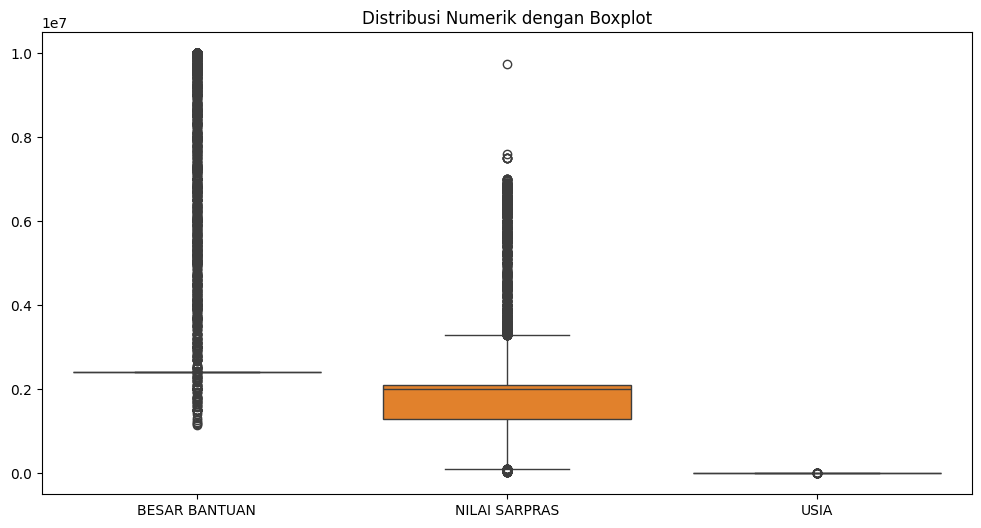

In [ ]:
# Statistik deskriptif untuk kolom numerik
print(df[['BESAR BANTUAN', 'NILAI SARPRAS', 'HASIL MONEV (OMZET)', 'USIA']].describe())

# Visualisasi distribusi kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['BESAR BANTUAN', 'NILAI SARPRAS', 'HASIL MONEV (OMZET)', 'USIA']
df[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Visualisasi boxplot untuk mendeteksi outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Distribusi Numerik dengan Boxplot')
plt.show()


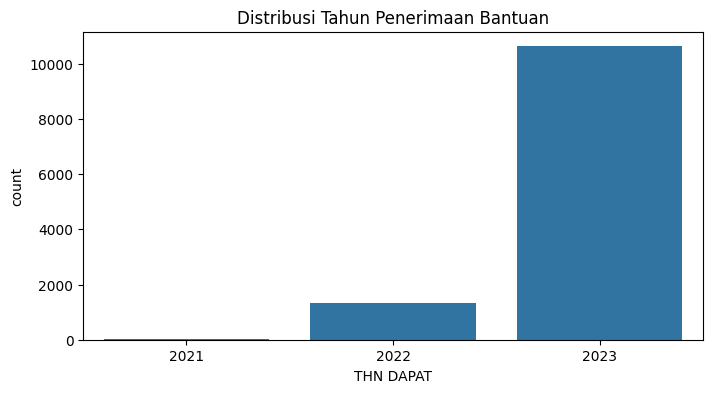

In [ ]:
# Tampilkan distribusi THN DAPAT
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='THN DAPAT')
plt.title('Distribusi Tahun Penerimaan Bantuan')
plt.show()


BOXPLOT DARI JENIS USAHA

       Jumlah Usaha
count     16.000000
mean      30.625000
std       13.275918
min       10.000000
25%       20.000000
50%       30.000000
75%       36.250000
max       60.000000


<ipython-input-54-f5e0380fe459>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Kategori', y='Jumlah Usaha', palette='viridis')


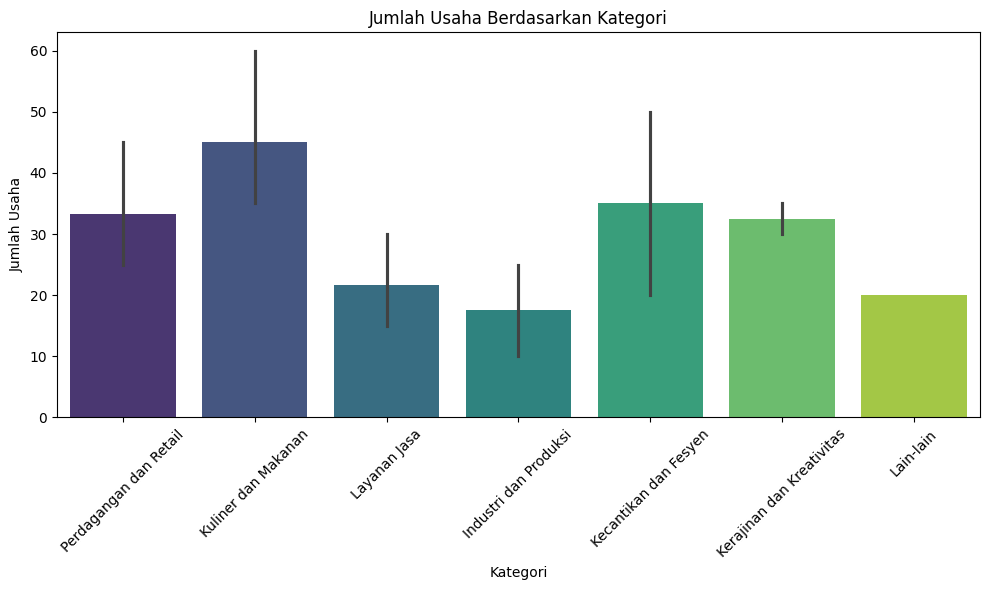

In [ ]:
# Data kategori usaha
data = {
    'Kategori': [
        'Perdagangan dan Retail', 'Perdagangan dan Retail', 'Perdagangan dan Retail',
        'Kuliner dan Makanan', 'Kuliner dan Makanan', 'Kuliner dan Makanan',
        'Layanan Jasa', 'Layanan Jasa', 'Layanan Jasa', 'Industri dan Produksi',
        'Industri dan Produksi', 'Kecantikan dan Fesyen', 'Kecantikan dan Fesyen',
        'Kerajinan dan Kreativitas', 'Kerajinan dan Kreativitas', 'Lain-lain'
    ],
    'Jumlah Usaha': [
        30, 45, 25, 40, 60, 35, 20, 30, 15, 25, 10, 50, 20, 35, 30, 20
    ]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menampilkan informasi dasar
print(df.describe())

# Visualisasi jumlah usaha berdasarkan kategori
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Kategori', y='Jumlah Usaha', palette='viridis')
plt.title('Jumlah Usaha Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Usaha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis lebih dalam dengan boxplot jika data lebih rinci
# Misalnya jika Anda memiliki data yang lebih rinci dalam kategori
# df['Jenis Usaha'] = [...]  # Contoh menambahkan kolom untuk jenis usaha
# sns.boxplot(data=df, x='Kategori', y='Jumlah Usaha')
# plt.title('Boxplot Jumlah Usaha Berdasarkan Kategori')
# plt.show()


standar devinisi adalah sama seperti bar eror

       Jumlah Usaha
count     16.000000
mean      30.625000
std       13.275918
min       10.000000
25%       20.000000
50%       30.000000
75%       36.250000
max       60.000000


<ipython-input-55-f5fd2dd6edbc>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Kategori', y='Jumlah Usaha', palette='viridis')


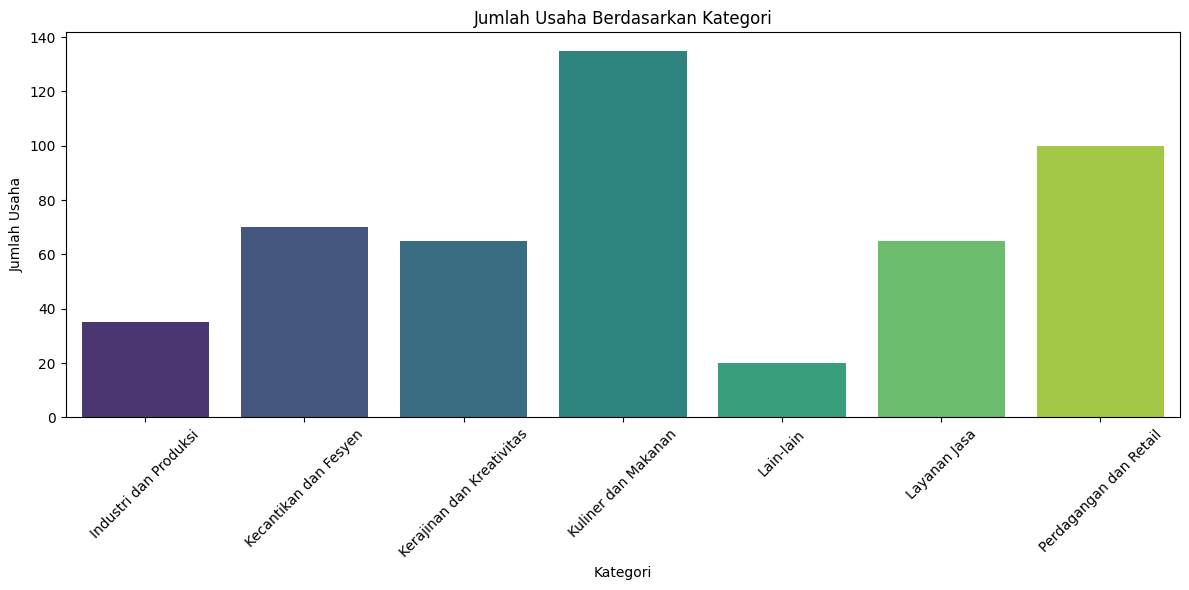

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data kategori usaha
data = {
    'Kategori': [
        'Perdagangan dan Retail', 'Perdagangan dan Retail', 'Perdagangan dan Retail',
        'Kuliner dan Makanan', 'Kuliner dan Makanan', 'Kuliner dan Makanan',
        'Layanan Jasa', 'Layanan Jasa', 'Layanan Jasa', 'Industri dan Produksi',
        'Industri dan Produksi', 'Kecantikan dan Fesyen', 'Kecantikan dan Fesyen',
        'Kerajinan dan Kreativitas', 'Kerajinan dan Kreativitas', 'Lain-lain'
    ],
    'Jumlah Usaha': [
        30, 45, 25, 40, 60, 35, 20, 30, 15, 25, 10, 50, 20, 35, 30, 20
    ]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menghitung jumlah usaha berdasarkan kategori
bar_data = df.groupby('Kategori', as_index=False)['Jumlah Usaha'].sum()

# Menampilkan informasi dasar
print(df.describe())

# Visualisasi jumlah usaha berdasarkan kategori
plt.figure(figsize=(12, 6))
sns.barplot(data=bar_data, x='Kategori', y='Jumlah Usaha', palette='viridis')
plt.title('Jumlah Usaha Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Usaha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


       Jumlah Usaha
count     16.000000
mean      30.625000
std       13.275918
min       10.000000
25%       20.000000
50%       30.000000
75%       36.250000
max       60.000000


<ipython-input-58-1d3252c776ae>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Kategori', y='Jumlah Usaha', palette='viridis')


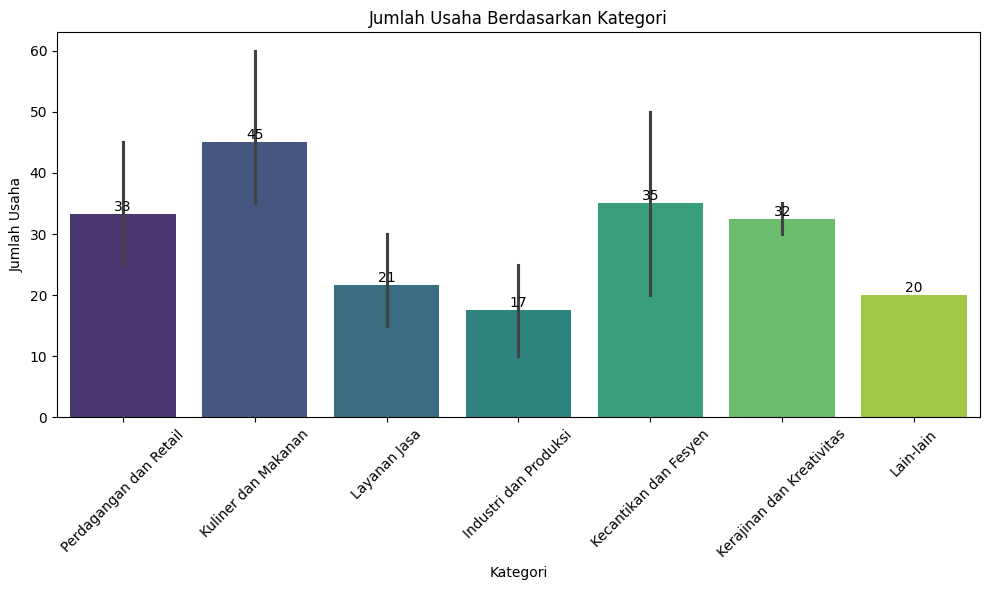

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data kategori usaha
data = {
    'Kategori': [
        'Perdagangan dan Retail', 'Perdagangan dan Retail', 'Perdagangan dan Retail',
        'Kuliner dan Makanan', 'Kuliner dan Makanan', 'Kuliner dan Makanan',
        'Layanan Jasa', 'Layanan Jasa', 'Layanan Jasa', 'Industri dan Produksi',
        'Industri dan Produksi', 'Kecantikan dan Fesyen', 'Kecantikan dan Fesyen',
        'Kerajinan dan Kreativitas', 'Kerajinan dan Kreativitas', 'Lain-lain'
    ],
    'Jumlah Usaha': [
        30, 45, 25, 40, 60, 35, 20, 30, 15, 25, 10, 50, 20, 35, 30, 20
    ]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menampilkan informasi dasar
print(df.describe())

# Visualisasi jumlah usaha berdasarkan kategori
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Kategori', y='Jumlah Usaha', palette='viridis')

# Menambahkan jumlah data di atas setiap batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Hanya tampilkan jika ada data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title('Jumlah Usaha Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Usaha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


       Number of Businesses
count             16.000000
mean              30.625000
std               13.275918
min               10.000000
25%               20.000000
50%               30.000000
75%               36.250000
max               60.000000


<ipython-input-73-e38c721c795d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Category', y='Number of Businesses', palette='viridis')


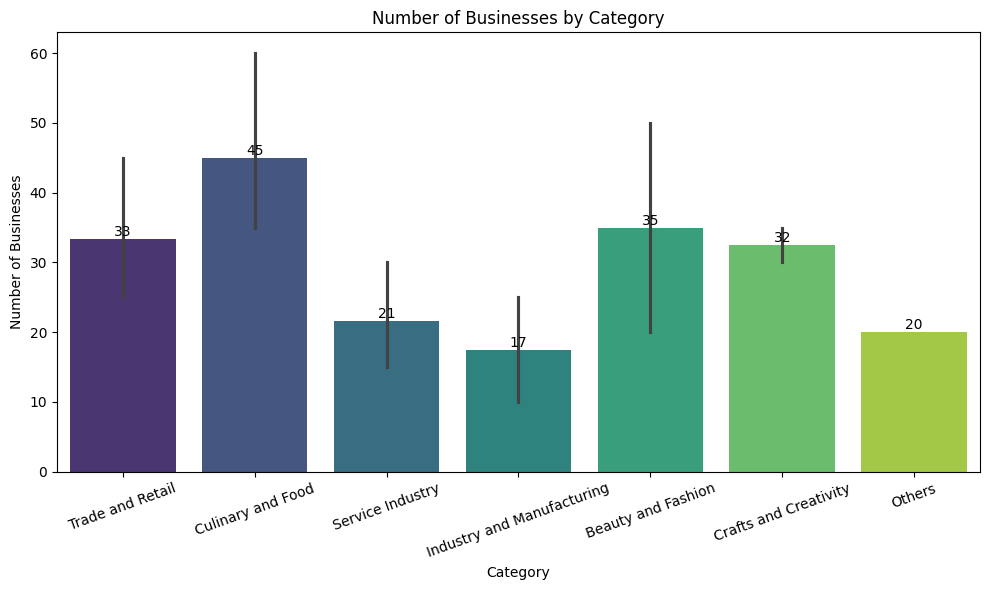

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Business category data
data = {
    'Category': [
        'Trade and Retail', 'Trade and Retail', 'Trade and Retail',
        'Culinary and Food', 'Culinary and Food', 'Culinary and Food',
        'Service Industry', 'Service Industry', 'Service Industry', 'Industry and Manufacturing',
        'Industry and Manufacturing', 'Beauty and Fashion', 'Beauty and Fashion',
        'Crafts and Creativity', 'Crafts and Creativity', 'Others'
    ],
    'Number of Businesses': [
        30, 45, 25, 40, 60, 35, 20, 30, 15, 25, 10, 50, 20, 35, 30, 20
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display basic information
print(df.describe())

# Visualization of the number of businesses by category
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Category', y='Number of Businesses', palette='viridis')

# Add data labels above each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only display if there is data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Update chart title and labels
plt.title('Number of Businesses by Category')
plt.xlabel('Category')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


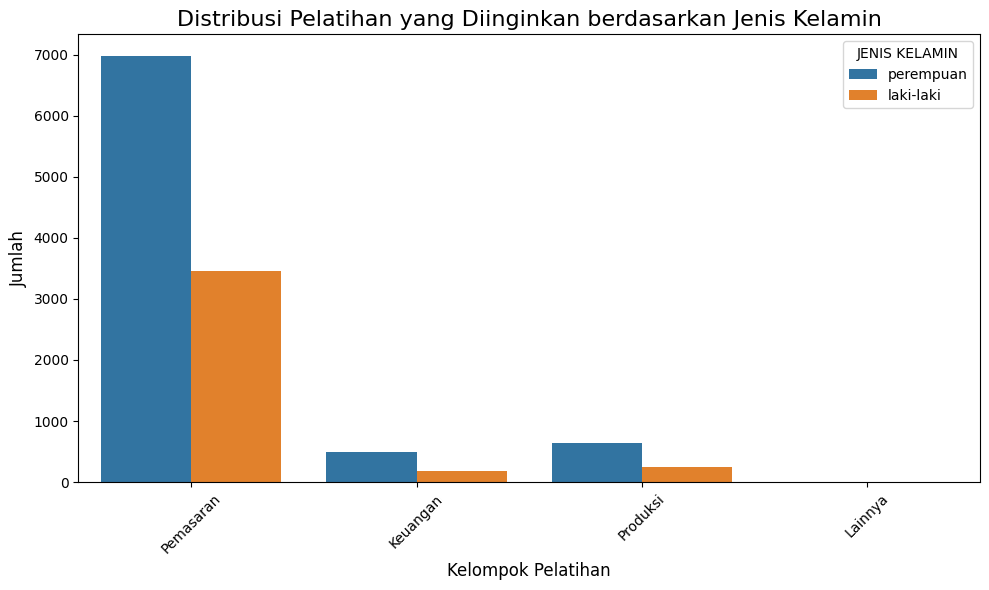

In [ ]:
# Fungsi untuk mengelompokkan pelatihan
def kelompok_pelatihan(pelatihan): # Mengubah ke huruf kecil untuk pencocokan yang lebih baik
    if 'pemasaran' in pelatihan:
        return 'Pemasaran'
    elif 'keuangan' in pelatihan:
        return 'Keuangan'
    elif 'produksi' in pelatihan:
        return 'Produksi'
    elif 'kualitas' in pelatihan:
        return 'Kualitas Produksi'
    elif 'manajemen' in pelatihan:
        return 'Manajemen Keuangan'
    else:
        return 'Lainnya'

# Menerapkan fungsi pengelompokan ke kolom PELATIHAN YANG DIINGINKAN
df['Kelompok Pelatihan'] = df['PELATIHAN YANG DIINGINKAN'].apply(kelompok_pelatihan)

# Visualisasi distribusi pelatihan yang diinginkan berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.countplot(x='Kelompok Pelatihan', hue='JENIS KELAMIN', data=df)
plt.title('Distribusi Pelatihan yang Diinginkan berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Kelompok Pelatihan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

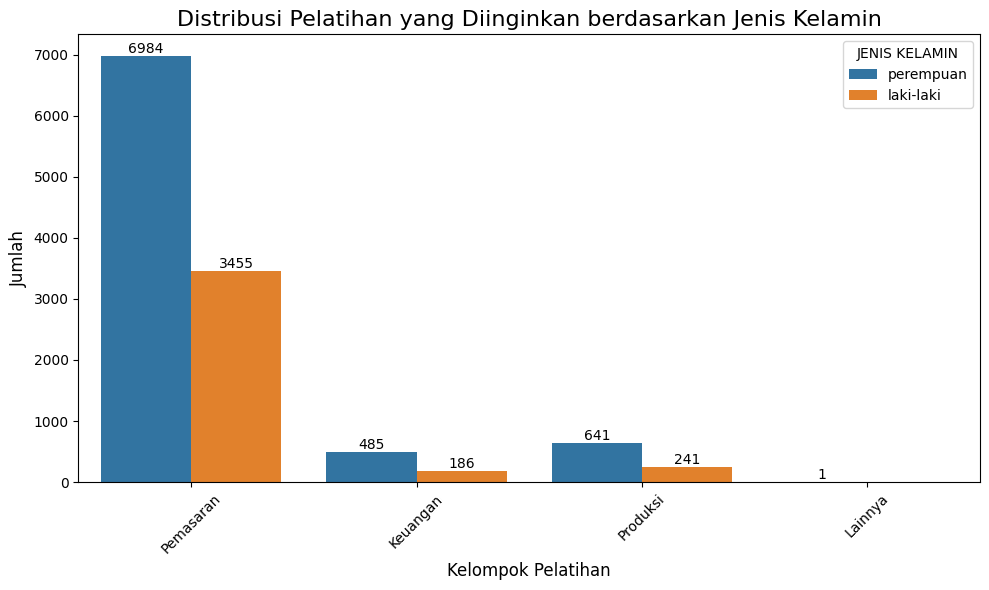

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mengelompokkan pelatihan
def kelompok_pelatihan(pelatihan):
    pelatihan = pelatihan.lower()  # Mengubah ke huruf kecil untuk pencocokan yang lebih baik
    if 'pemasaran' in pelatihan:
        return 'Pemasaran'
    elif 'keuangan' in pelatihan:
        return 'Keuangan'
    elif 'produksi' in pelatihan:
        return 'Produksi'
    elif 'kualitas' in pelatihan:
        return 'Kualitas Produksi'
    elif 'manajemen' in pelatihan:
        return 'Manajemen Keuangan'
    else:
        return 'Lainnya'

# Menerapkan fungsi pengelompokan ke kolom PELATIHAN YANG DIINGINKAN
df['Kelompok Pelatihan'] = df['PELATIHAN YANG DIINGINKAN'].apply(kelompok_pelatihan)

# Visualisasi distribusi pelatihan yang diinginkan berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Kelompok Pelatihan', hue='JENIS KELAMIN', data=df)

# Menambahkan jumlah data di atas setiap batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Hanya tampilkan jika ada data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribusi Pelatihan yang Diinginkan berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Kelompok Pelatihan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


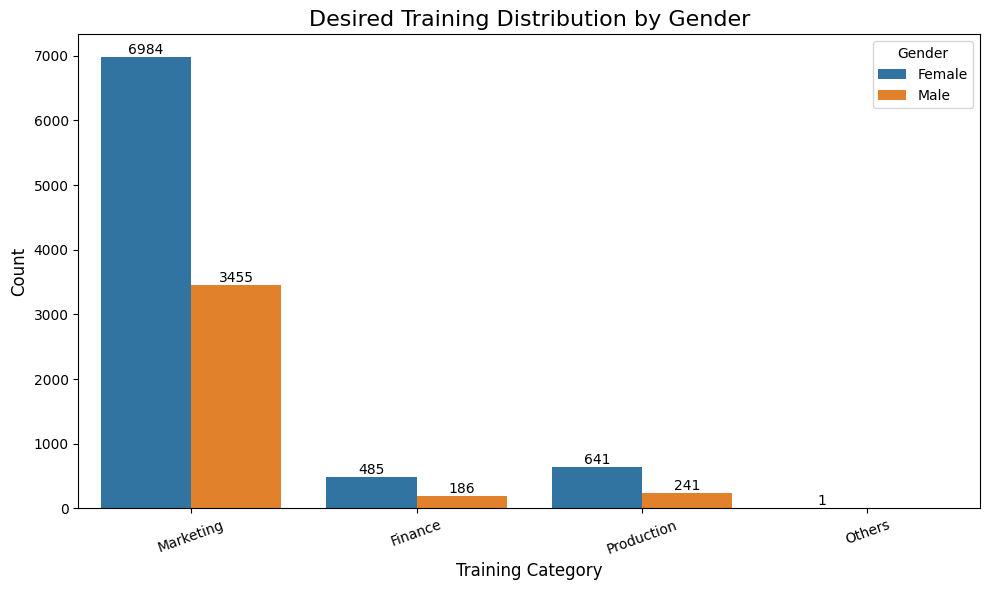

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to categorize training types
def training_category(training):
    training = training.lower()  # Convert to lowercase for better matching
    if 'pemasaran' in training:
        return 'Marketing'
    elif 'keuangan' in training:
        return 'Finance'
    elif 'produksi' in training:
        return 'Production'
    elif 'kualitas' in training:
        return 'Production Quality'
    elif 'manajemen' in training:
        return 'Financial Management'
    else:
        return 'Others'

# Function to translate gender labels
def translate_gender(gender):
    gender_map = {
        'Laki-laki': 'Male',
        'Perempuan': 'Female'
    }
    return gender_map.get(gender, gender)  # Default to original if not found

# Apply the categorization function to the 'Desired Training' column
df['Training Category'] = df['PELATIHAN YANG DIINGINKAN'].apply(training_category)

# Apply gender translation
df['Gender'] = df['JENIS KELAMIN'].apply(translate_gender)

# Visualization of desired training distribution by gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Training Category', hue='Gender', data=df)

# Add data labels above each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only display if there is data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Update chart title and labels
plt.title('Desired Training Distribution by Gender', fontsize=16)
plt.xlabel('Training Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


<ipython-input-78-29c9f8904f70>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_count.index, y=kategori_count.values, palette='viridis')


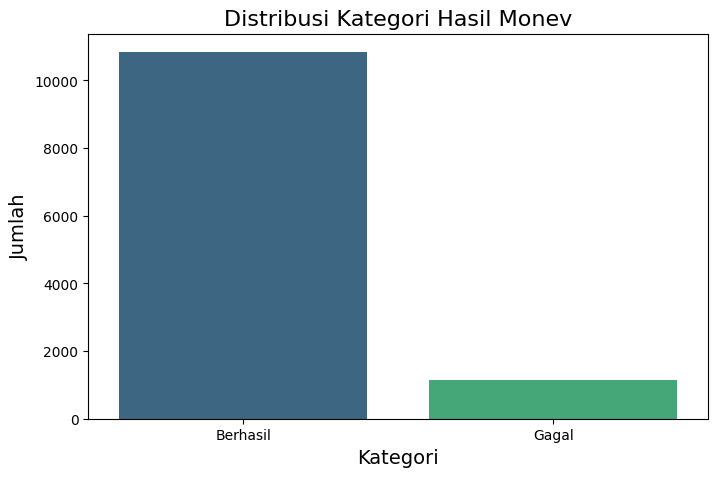

In [ ]:
# Menghapus spasi ekstra di awal dan akhir
df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].str.strip()

# Mengkategorikan hasil monev
def categorize_result(value):
    if value in ['naik', 'tetap']:
        return 'Berhasil'
    else:
        return 'Gagal'

# Mengaplikasikan fungsi untuk membuat kolom kategori baru
df['KATEGORI'] = df['HASIL MONEV (OMZET)'].apply(categorize_result)

# Menghitung jumlah setiap kategori
kategori_count = df['KATEGORI'].value_counts()

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=kategori_count.index, y=kategori_count.values, palette='viridis')
plt.title('Distribusi Kategori Hasil Monev', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=0)


# Menampilkan plot
plt.show()

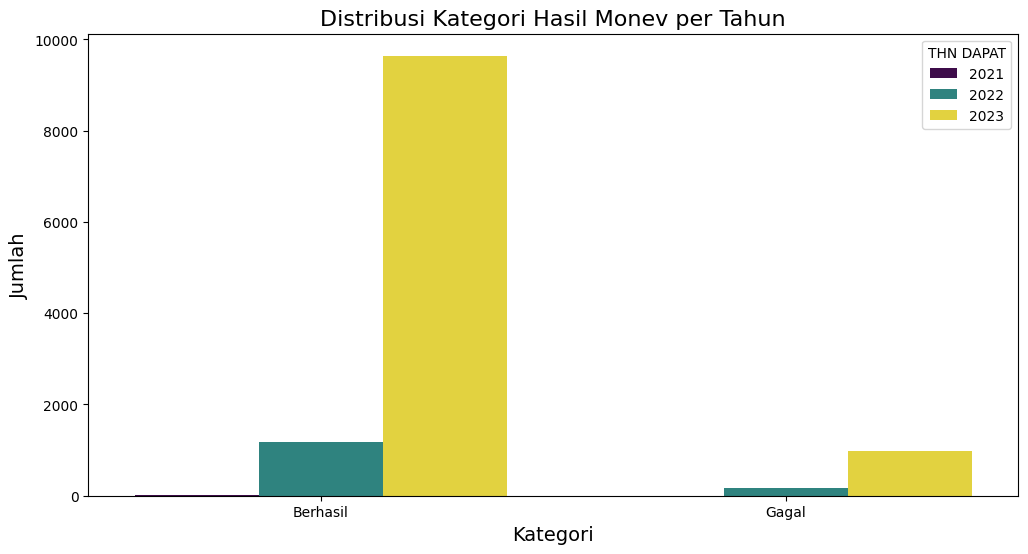

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus spasi ekstra di awal dan akhir
df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].str.strip()

# Mengkategorikan hasil monev
def categorize_result(value):
    if value in ['naik', 'tetap']:
        return 'Berhasil'
    else:
        return 'Gagal'

# Mengaplikasikan fungsi untuk membuat kolom kategori baru
df['KATEGORI'] = df['HASIL MONEV (OMZET)'].apply(categorize_result)

# Visualisasi menggunakan Seaborn dengan hue 'Tahun'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='KATEGORI', hue='THN DAPAT', palette='viridis')
plt.title('Distribusi Kategori Hasil Monev per Tahun', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=0)

# Menampilkan plot
plt.show()


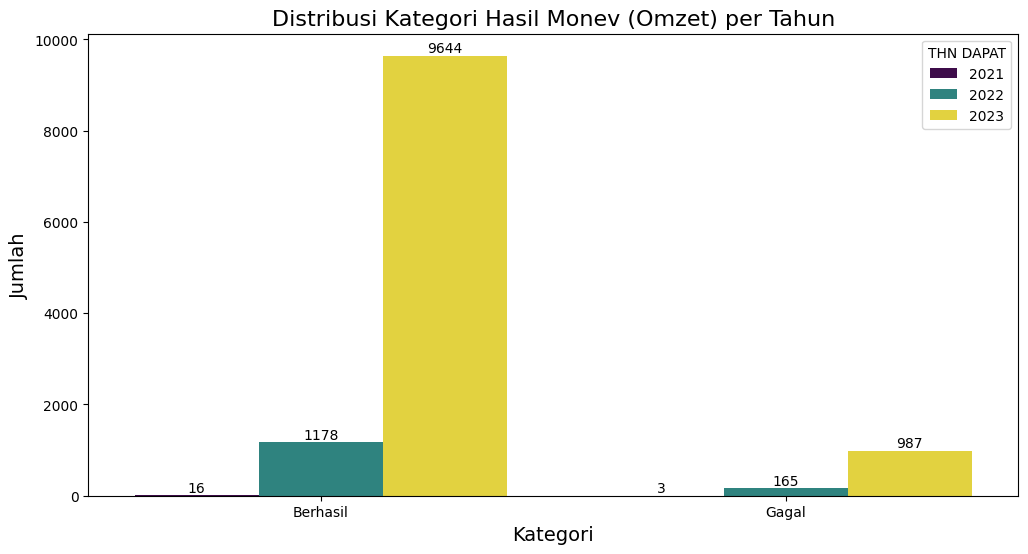

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus spasi ekstra di awal dan akhir
df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].str.strip()

# Mengkategorikan hasil monev
def categorize_result(value):
    if value in ['naik', 'tetap']:
        return 'Berhasil'
    else:
        return 'Gagal'

# Mengaplikasikan fungsi untuk membuat kolom kategori baru
df['KATEGORI'] = df['HASIL MONEV (OMZET)'].apply(categorize_result)

# Visualisasi menggunakan Seaborn dengan hue 'Tahun'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='KATEGORI', hue='THN DAPAT', palette='viridis')
plt.title('Distribusi Kategori Hasil Monev (Omzet) per Tahun', fontsize=16)
plt.xlabel('Kategori', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=0)

# Menambahkan jumlah data di atas setiap batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Hanya tampilkan jika ada data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Menampilkan plot
plt.show()


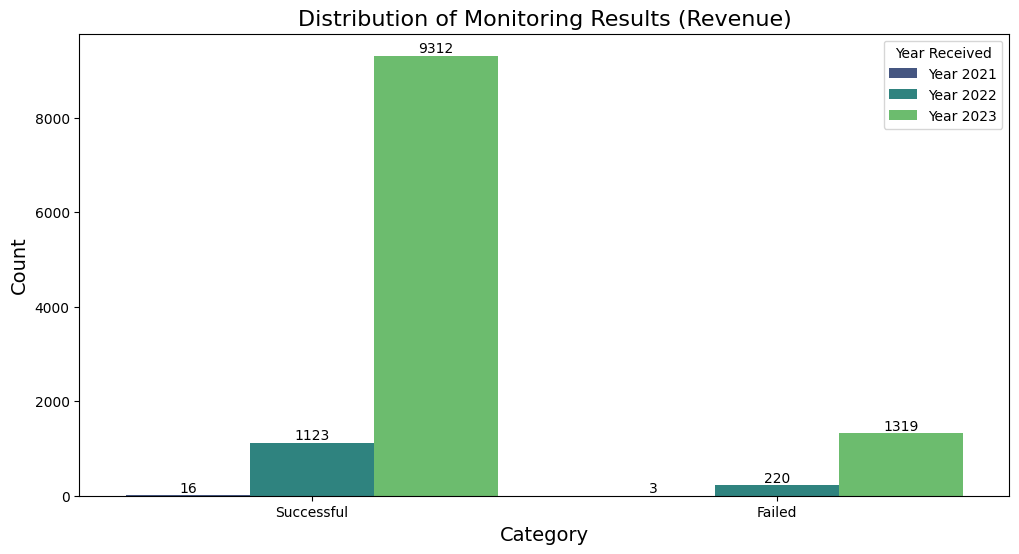

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghapus spasi ekstra di awal dan akhir
df['HASIL MONEV (OMZET)'] = df['HASIL MONEV (OMZET)'].str.strip()

# Mengkategorikan hasil monev ke dalam bahasa Inggris
def categorize_result(value):
    if value in ['naik', 'tetap']:
        return 'Successful'
    else:
        return 'Failed'

# Menerapkan fungsi untuk membuat kolom kategori baru dalam bahasa Inggris
df['Category'] = df['HASIL MONEV (OMZET)'].apply(categorize_result)

# Konversi 'THN DAPAT' ke tipe numerik
df['THN DAPAT'] = pd.to_numeric(df['THN DAPAT'], errors='coerce')

# Filter hanya tahun 2021-2023
df = df[df['THN DAPAT'].between(2021, 2023)]

# Menerjemahkan tahun ke dalam format bahasa Inggris
df['Year Received'] = df['THN DAPAT'].astype(str).apply(lambda x: f'Year {x}')

# Mengurutkan Year Received dalam legenda
df['Year Received'] = pd.Categorical(df['Year Received'], categories=['Year 2021', 'Year 2022', 'Year 2023'], ordered=True)

# Visualisasi menggunakan Seaborn dengan hue 'Year Received'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Category', hue='Year Received', palette='viridis')

# Menyesuaikan tampilan
plt.title('Distribution of Monitoring Results (Revenue)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Year Received')

# Menambahkan jumlah data di atas setiap batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Hanya tampilkan jika ada data
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Menampilkan plot
plt.show()


Label Encoder untuk mengubah data kategorik menjadi numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['JENIS USAHA'] = le.fit_transform(df['JENIS USAHA'])
df['JENIS SARPRAS'] = le.fit_transform(df['JENIS SARPRAS'])
df['HASIL MONEV (OMZET)'] = le.fit_transform(df['HASIL MONEV (OMZET)'])
df['PELATIHAN YANG DIINGINKAN'] = le.fit_transform(df['PELATIHAN YANG DIINGINKAN'])
df['JENIS KELAMIN'] = le.fit_transform(df['JENIS KELAMIN'])
df['THN DAPAT'] = le.fit_transform(df['THN DAPAT'])

df.head()


,THN DAPAT,JENIS USAHA,BESAR BANTUAN,JENIS SARPRAS,NILAI SARPRAS,HASIL MONEV (OMZET),PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
0,2,331,2400000,5166,2120000.0,2,14,1,57
1,2,302,2400000,3963,700000.0,2,14,0,60
2,2,262,2400000,5846,1927000.0,2,14,1,37
3,2,299,2400000,4711,1400000.0,3,14,1,21
4,2,332,2400000,3022,940000.0,3,14,0,57


Pemilihan Fitur

In [ ]:
features = ['JENIS SARPRAS', 'JENIS USAHA', 'THN DAPAT', 'BESAR BANTUAN', 'NILAI SARPRAS',
            'PELATIHAN YANG DIINGINKAN', 'JENIS KELAMIN', 'USIA']
X = df[features]
y = df['HASIL MONEV (OMZET)']

In [ ]:
X

,JENIS SARPRAS,JENIS USAHA,THN DAPAT,BESAR BANTUAN,NILAI SARPRAS,PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
0,5166,331,2,2400000,2120000.0,14,1,57
1,3963,302,2,2400000,700000.0,14,0,60
2,5846,262,2,2400000,1927000.0,14,1,37
3,4711,299,2,2400000,1400000.0,14,1,21
4,3022,332,2,2400000,940000.0,14,0,57
...,...,...,...,...,...,...,...,...
11988,1154,161,1,7410000,4850000.0,14,0,36
11989,1154,212,1,3950000,2500000.0,14,1,41
11990,1154,161,1,4730000,3000000.0,14,0,39
11991,1154,302,1,9950000,6500000.0,14,1,43


In [ ]:
y

,HASIL MONEV (OMZET)
0,2
1,2
2,2
3,3
4,3
...,...
11988,3
11989,3
11990,3
11991,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42, k_neighbors=1)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Data Training (Data Latih)

In [ ]:
X_train

,JENIS SARPRAS,JENIS USAHA,THN DAPAT,BESAR BANTUAN,NILAI SARPRAS,PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
8084,1280,302,2,2400000,1796000.0,13,1,54
7440,489,262,2,2400000,1105000.0,13,1,33
288,1928,280,2,2400000,1700000.0,0,1,40
4969,997,262,2,2400000,2020000.0,14,1,61
10000,1488,262,2,2400000,700000.0,13,0,61
...,...,...,...,...,...,...,...,...
11964,1154,161,1,5500000,3575000.0,14,0,24
5191,3963,304,2,2400000,500000.0,14,0,37
5390,2146,262,2,2400000,1000000.0,13,0,57
860,517,265,2,2400000,2210000.0,4,0,44


In [ ]:
y_train

,HASIL MONEV (OMZET)
8084,3
7440,3
288,4
4969,2
10000,3
...,...
11964,4
5191,4
5390,3
860,3


Data Test (data Uji)

In [ ]:
X_test

,JENIS SARPRAS,JENIS USAHA,THN DAPAT,BESAR BANTUAN,NILAI SARPRAS,PELATIHAN YANG DIINGINKAN,JENIS KELAMIN,USIA
10414,427,262,2,2400000,1.063000e+06,13,0,53
1369,1510,262,2,2400000,2.083000e+06,13,1,29
1718,1154,262,2,2400000,1.999304e+06,13,1,62
8239,5129,262,2,2400000,1.800000e+05,21,1,44
360,4387,331,2,2400000,1.950000e+06,9,1,27
...,...,...,...,...,...,...,...,...
11121,1154,161,1,7000000,4.550000e+06,14,0,58
5465,555,158,2,2400000,2.008000e+06,14,1,42
3851,1154,204,2,2400000,1.999304e+06,21,1,19
3070,320,302,2,2400000,6.000000e+04,14,1,48


In [ ]:
y_test

,HASIL MONEV (OMZET)
10414,3
1369,2
1718,3
8239,3
360,3
...,...
11121,3
5465,3
3851,3
3070,3


# **Modeling**

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    max_depth=5,                 # Mengurangi kedalaman pohon
    max_features=8,              # Membatasi fitur yang dipertimbangkan di setiap split
    n_estimators=300,            # Jumlah pohon
    min_samples_split=5,         # Minimal sampel untuk melakukan split
    min_samples_leaf=5,          # Minimal sampel untuk leaf node
    random_state=42

)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [ ]:
# Menampilkan jumlah pohon dan rata-rata kedalaman pohon dalam Random Forest
num_trees = len(model.estimators_)
depths = [tree.tree_.max_depth for tree in model.estimators_]

print(f"Jumlah Pohon dalam Random Forest: {num_trees}")
print(f"Rata-rata Kedalaman Pohon: {sum(depths) / num_trees:.2f}")


Jumlah Pohon dalam Random Forest: 300
Rata-rata Kedalaman Pohon: 5.00


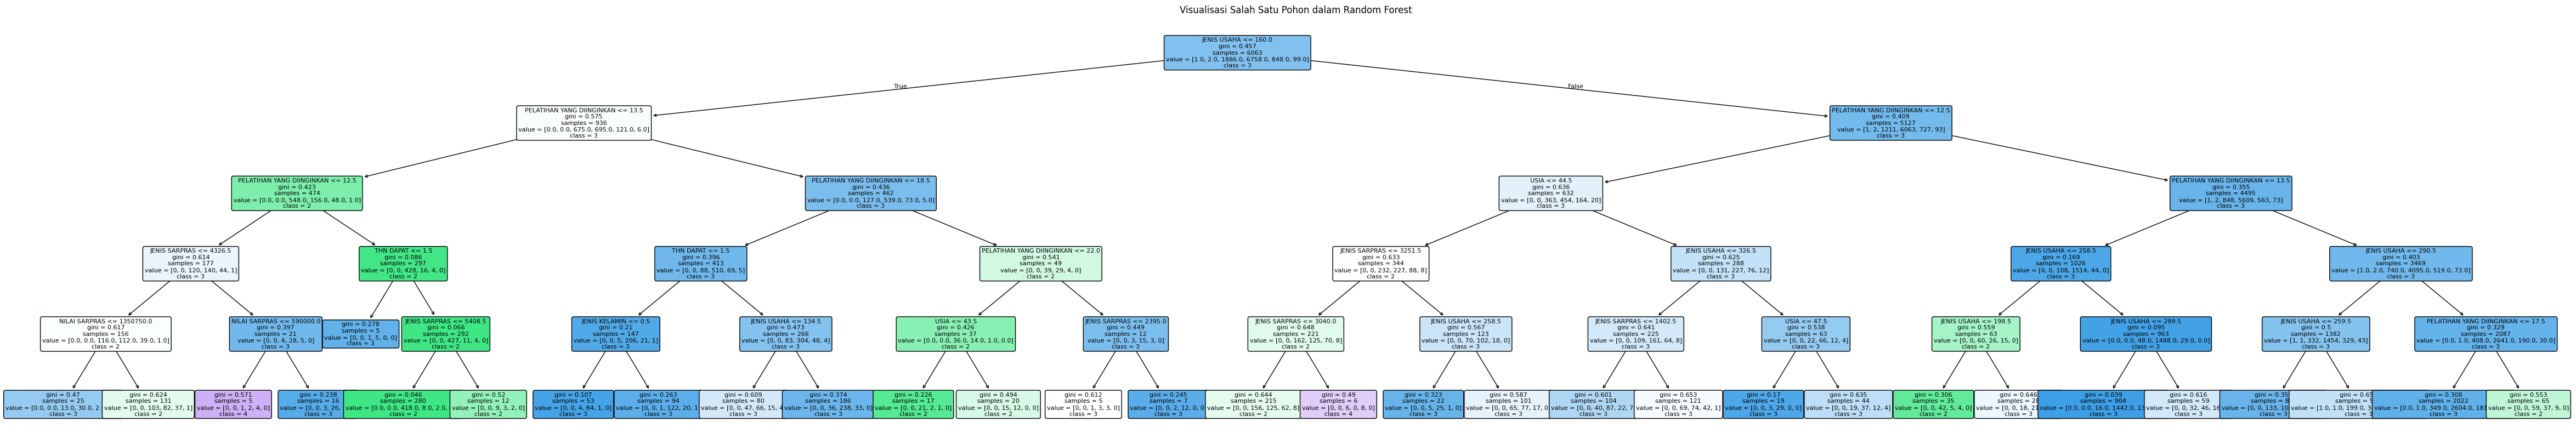

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Pastikan model sudah dilatih sebelum menjalankan kode ini
plt.figure(figsize=(60, 10))
plot_tree(model.estimators_[0],  # Pilih pohon pertama
          feature_names=X_train.columns,
          class_names=list(map(str, model.classes_)),
          filled=True, rounded=True, fontsize=8)

plt.title("Visualisasi Salah Satu Pohon dalam Random Forest")
plt.show()


# **Evaluasi**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation dengan 5 fold
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Cetak hasil cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy: {:.2%}".format(np.mean(scores)))
print("Standard deviation: {:.2%}".format(np.std(scores)))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.71654856 0.76948729 0.75406419 0.74311927 0.7235196 ]
Mean accuracy: 74.13%
Standard deviation: 1.94%


untuk menilai performa dan kemampuan generalisasi model. Ini dilakukan dengan membagi dataset menjadi beberapa subset (folds) dan menjalankan proses pelatihan dan evaluasi beberapa kali agar hasil evaluasi lebih akurat dan tidak bias.

In [ ]:
# Prediksi pada data train dan test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Hitung akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cetak hasil akurasi
print(f'Akurasi Train: {train_accuracy:.2%}')
print(f'Akurasi Test: {test_accuracy:.2%}')

Akurasi Train: 75.96%
Akurasi Test: 74.95%


In [ ]:

# Evaluasi akurasi pada data latih dan data uji
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train Accuracy: {:.2%}".format(train_accuracy))
print("Test Accuracy: {:.2%}".format(test_accuracy))

# Perbandingan akurasi untuk memeriksa overfitting
if train_accuracy > test_accuracy + 0.05:
    print("Model kemungkinan mengalami overfitting.")
else:
    print("Model memiliki generalisasi yang cukup baik.")

Train Accuracy: 75.96%
Test Accuracy: 74.95%
Model memiliki generalisasi yang cukup baik.


Prediksi data test menggunakan model random forest yang sudah dibangun

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
10414,3,3
1369,2,3
1718,3,3
8239,3,3
360,3,3
...,...,...
11121,3,3
5465,3,3
3851,3,3
3070,3,3


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   0    0    1    0    0]
 [   0  170  330    0    0]
 [   0   30 1628    0    0]
 [   0   13  201    0    0]
 [   0    1   25    0    0]]


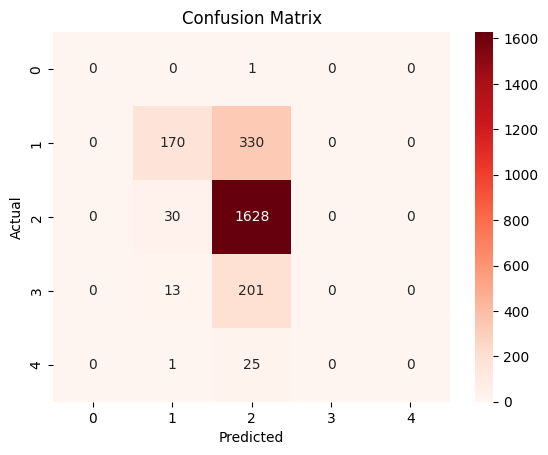

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy RF: {accuracy:.2f}")

Accuracy RF: 0.75


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Sesuaikan dengan kebutuhan
recall = recall_score(y_test, y_pred, average='macro')

# Menampilkan hasil
print(f"Accuracy RF: {accuracy:.2f}")
print(f"Precision RF: {precision:.2f}")
print(f"Recall RF: {recall:.2f}")


Accuracy RF: 0.75
Precision RF: 0.31
Recall RF: 0.26


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
5,PELATIHAN YANG DIINGINKAN,0.499944
1,JENIS USAHA,0.437596
4,NILAI SARPRAS,0.016363
0,JENIS SARPRAS,0.014942
7,USIA,0.013731
2,THN DAPAT,0.010398
3,BESAR BANTUAN,0.005973
6,JENIS KELAMIN,0.001053


                     Feature  Importance
5  PELATIHAN YANG DIINGINKAN    0.499944
1                JENIS USAHA    0.437596
4              NILAI SARPRAS    0.016363
0              JENIS SARPRAS    0.014942
7                       USIA    0.013731
2                  THN DAPAT    0.010398
3              BESAR BANTUAN    0.005973
6              JENIS KELAMIN    0.001053


<ipython-input-106-207901149806>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


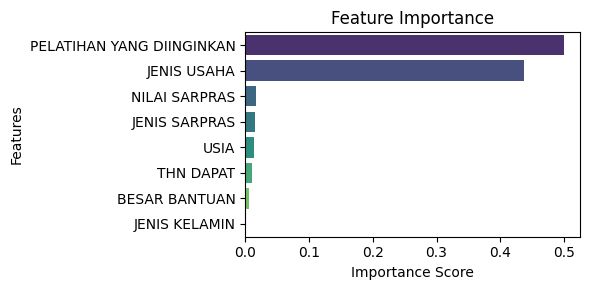

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung feature importance
feature_importance = model.feature_importances_
feature_names = X_train.columns

# Membuat dataframe untuk feature importance
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Mengurutkan feature importance secara descending
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Menampilkan dataframe feature importance
print(df_feature_importance)


# Visualisasi feature importance
plt.figure(figsize=(6, 3))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_feature_importance,
    palette='viridis'
)

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(df_comparison['Actual'].unique())
y_test_binarized = label_binarize(df_comparison['Actual'], classes=classes)
y_pred_prob = model.predict_proba(X_test)  # Probabilitas prediksi untuk semua kelas

# ROC and AUC for each class
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


# Menghitung probabilitas prediksi
y_probs = model.predict_proba(X_test)

# Binarize y_test untuk multiclass
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Inisialisasi variabel untuk menyimpan nilai
fpr = dict()
tpr = dict()
roc_auc = dict()

# Hitung ROC curve dan AUC untuk setiap kelas
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Menggambar ROC curve untuk setiap kelas
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve kelas {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Garis acuan (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve untuk Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(df_comparison['Actual'].unique())
y_test_binarized = label_binarize(df_comparison['Actual'], classes=classes)
y_pred_prob = model.predict_proba(X_test)  # Probabilitas prediksi untuk semua kelas

# ROC and AUC for each class
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


# **Scatterplot**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Mengelompokkan data untuk menghitung jumlah titik yang bertumpuk
grouped = df_comparison.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')

# Membuat scatter plot dengan ukuran lingkaran berdasarkan 'Count'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    grouped['Actual'],
    grouped['Predicted'],
    s=grouped['Count'] * 10,  # Ukuran lingkaran disesuaikan dengan jumlah data
    alpha=0.6
)

# Menambahkan garis referensi y=x
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='Perfect Prediction')

# Menambahkan judul, label sumbu, dan grid
plt.title('Scatter Plot of Actual vs Predicted (Multi-class) Model RF')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh dataframe untuk multiple class
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Class': y_test  # Gunakan kolom ini untuk warna (dapat disesuaikan)
})

# Menghitung jumlah data yang bertumpuk berdasarkan kombinasi Actual dan Predicted
grouped = df_comparison.groupby(['Actual', 'Predicted', 'Class']).size().reset_index(name='Count')

# Menentukan batas minimum dan maksimum untuk plot
min_value = 0  # Pastikan batas minimum dimulai dari 0
max_value = max(grouped['Actual'].max(), grouped['Predicted'].max())

# Membuat scatter plot dengan ukuran lingkaran berdasarkan jumlah data dan warna berdasarkan kelas
plt.figure(figsize=(10, 6))

# Membuat scatter plot dengan ukuran lingkaran berdasarkan 'Count'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    grouped['Actual'],
    grouped['Predicted'],
    s=grouped['Count'] * 10,  # Ukuran lingkaran disesuaikan dengan jumlah data
    alpha=0.6
)

# Menambahkan garis referensi y=x (diagonal lurus)
plt.plot(
    [min_value, max_value + 1],
    [min_value, max_value + 1],
    color='red',
    linestyle='-',
    linewidth=2
)

# Menyesuaikan batas plot
plt.xlim(min_value, max_value + 1)
plt.ylim(min_value, max_value + 1)

# Menambahkan ticks pada sumbu x dan y
plt.xticks(np.arange(min_value, max_value + 0.2))
plt.yticks(np.arange(min_value, max_value + 0.2))

# Menambahkan judul, label, dan legenda
plt.title('Scatter Plot of Actual vs Predicted (Multi-class) Model RF')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh dataframe untuk multiple class
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Class': y_test  # Gunakan kolom ini untuk warna (dapat disesuaikan)
})

# Menghitung jumlah data yang bertumpuk berdasarkan kombinasi Actual dan Predicted
grouped = df_comparison.groupby(['Actual', 'Predicted', 'Class']).size().reset_index(name='Count')

# Menentukan batas minimum dan maksimum untuk plot
min_value = 0  # Pastikan batas minimum dimulai dari 0
max_value = max(grouped['Actual'].max(), grouped['Predicted'].max())

# Membuat scatter plot dengan ukuran lingkaran berdasarkan jumlah data dan warna berdasarkan kelas
plt.figure(figsize=(10, 6))

# Mendapatkan palet warna unik untuk kelas
unique_classes = grouped['Class'].unique()
palette = sns.color_palette("tab10", len(unique_classes))  # Palet warna diganti ke 'tab10'
class_color_map = {cls: palette[i] for i, cls in enumerate(unique_classes)}

# Plot tiap kelas dengan warna berbeda
for cls in unique_classes:
    subset = grouped[grouped['Class'] == cls]
    plt.scatter(
        subset['Actual'],
        subset['Predicted'],
        s=subset['Count'] * 10,  # Ukuran lingkaran disesuaikan dengan jumlah data
        alpha=0.6,
        color=class_color_map[cls],
        label=f'{cls}'  # Label hanya menampilkan nama kelas
    )

# Menambahkan garis referensi y=x (diagonal lurus)
plt.plot(
    [min_value, max_value + 1],
    [min_value, max_value + 1],
    color='red',
    linestyle='-',
    linewidth=2,
    label='y = x'
)

# Menyesuaikan batas plot
plt.xlim(min_value, max_value + 1)
plt.ylim(min_value, max_value + 1)

# Menambahkan ticks pada sumbu x dan y
plt.xticks(np.arange(min_value, max_value + 1, step=1))
plt.yticks(np.arange(min_value, max_value + 1, step=1))

# Menambahkan judul, label, dan layout
plt.title('Scatter Plot of Actual vs Predicted (Multi-class) Model RF')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Membuat legenda hanya dengan titik warna
handles = [
    plt.Line2D([1], [1], marker='o', color='w', markerfacecolor=class_color_map[cls], markersize=10, label=str(cls))
    for cls in unique_classes
]
plt.legend(handles=handles, title='Class', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh dataframe untuk multiple class
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Class': y_test  # Gunakan kolom ini untuk warna (dapat disesuaikan)
})

# Menambahkan jitter dengan distribusi normal untuk persebaran lebih tercampur
jitter_strength = 0.5  # Sesuaikan kekuatan jitter
df_comparison['Actual_jitter'] = df_comparison['Actual'] + np.random.normal(0, jitter_strength, size=df_comparison.shape[0])
df_comparison['Predicted_jitter'] = df_comparison['Predicted'] + np.random.normal(0, jitter_strength, size=df_comparison.shape[0])

# Menentukan batas minimum dan maksimum untuk plot
min_value = 0  # Pastikan batas minimum dimulai dari 0
max_value = max(df_comparison['Actual_jitter'].max(), df_comparison['Predicted_jitter'].max())

# Membuat scatter plot dengan warna berdasarkan kelas
plt.figure(figsize=(10, 6))

# Tentukan palet warna untuk setiap kelas
palette = sns.color_palette("Set1", n_colors=df_comparison['Class'].nunique())

scatter = sns.scatterplot(
    x='Actual_jitter',
    y='Predicted_jitter',
    hue='Class',  # Warna berdasarkan kelas
    data=df_comparison,
    palette=palette,  # Skema warna dengan palet yang berbeda untuk tiap kelas
    alpha=0.7
)

# Menambahkan garis referensi y=x (diagonal lurus), dengan margin sedikit di atas dan di bawah
plt.plot([min_value -0.2, max_value + 0.5], [min_value -0.2, max_value + 0.5],
         color='red', linestyle='-', linewidth=2, label='Perfect Prediction')

# Menyesuaikan batas plot agar memiliki margin di atas dan di bawah
plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)

# Menambahkan ticks pada sumbu x dan y dimulai dari 0 dalam kelipatan tertentu (kelipatan 2)

plt.xticks(np.arange(0, np.ceil(max_value)))
plt.yticks(np.arange(0, np.ceil(max_value)))

# Menambahkan judul, label, dan legenda
plt.title('Scatter Plot of Actual vs Predicted (Multi-class) Model RF')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membuat scatter plot dengan warna berdasarkan kelas
plt.figure(figsize=(10, 6))


# Scatter plot dengan warna berdasarkan kelas
scatter = sns.scatterplot(
    x='Actual',
    y='Predicted',
    data=df_comparison,
    alpha=0.2
)

# Menambahkan garis referensi y=x
min_val = min(df_comparison['Actual'].min(), df_comparison['Predicted'].min())
max_val = max(df_comparison['Actual'].max(), df_comparison['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='Perfect Prediction')

# Menambahkan judul, label sumbu, dan grid
plt.title('Scatter Plot of Actual vs Predicted (Multi-class) Model RF')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_comparison['Actual'], df_comparison['Predicted'], alpha=0.6, color='b')
plt.plot([df_comparison['Actual'].min(), df_comparison['Actual'].max()],
         [df_comparison['Actual'].min(), df_comparison['Actual'].max()],
         color='red', linestyle='-', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Misalnya, target 'HASIL MONEV (OMZET)' adalah kategorikal
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi target kategorikal menjadi numerik
y_encoded = label_encoder.fit_transform(df['HASIL MONEV (OMZET)'])

# Menampilkan label numerik yang dihasilkan
print("Label Numerik:", y_encoded)

# Menampilkan kelas kategorikal asli yang sesuai dengan label numerik
print("Kelas Kategorikal:", label_encoder.classes_)

# Jika ingin mengonversi label numerik kembali ke label kategorikal asli
y_decoded = label_encoder.inverse_transform(y_encoded)
print("Label Kategorikal Kembali:", y_decoded)


In [ ]:
# Menampilkan histogram untuk distribusi target
sns.histplot(df['HASIL MONEV (OMZET)'], kde=True)
plt.title('Distribusi HASIL MONEV (OMZET)')
plt.show()


# **Classification Report**

In [ ]:

print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi Feature Importance (pentingnya setiap fitur)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.34      0.48       500
           3       0.75      0.98      0.85      1658
           4       0.00      0.00      0.00       214
           5       0.00      0.00      0.00        26

    accuracy                           0.75      2399
   macro avg       0.31      0.26      0.26      2399
weighted avg       0.68      0.75      0.68      2399



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy RandomForest: {accuracy:.2f}")

# Hitung presisi
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision RandomForest: {precision:.2f}")

# Hitung recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall RandomForest: {recall:.2f}")

# Hitung F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score RandomForest: {f1:.2f}")


Accuracy RandomForest: 0.75
Precision RandomForest: 0.68
Recall RandomForest: 0.75
F1 Score RandomForest: 0.68


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Ftur importance tiap kolom**

# **IMPORTAN KOLOM JENIS SARPRAS**

In [ ]:

# Pilih kolom yang diperlukan, misalnya kolom 'JENIS SARPRAS' sebagai fitur dan 'HASIL MONEV (OMZET)' sebagai label
X = df[['JENIS SARPRAS']]  # Fitur hanya kolom JENIS SARPRAS
y = df['HASIL MONEV (OMZET)']  # HASIL MONEV (OMZET) atau label

# Lakukan one-hot encoding pada kolom JENIS SARPRAS
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi hasil encoding menjadi dataframe dengan kolom sesuai kategori yang dihasilkan
encoded_columns = encoder.get_feature_names_out(['JENIS SARPRAS'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(

    random_state=42

)

# Latih model
model.fit(X_train, y_train)

# Ambil feature importance dari kolom-kolom yang sudah di-encode
importance = model.feature_importances_

# Buat dataframe untuk menampilkan kolom hasil encoding dan tingkat kepentingannya
feature_importance_df = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan feature importance dari masing-masing kategori dalam kolom JENIS SARPRAS
print(feature_importance_df)

# **IMPORTAN Kolom JENIS USAHA**

In [ ]:

# Pilih kolom yang diperlukan, misalnya kolom 'JENIS SARPRAS' sebagai fitur dan 'HASIL MONEV (OMZET)' sebagai label
X = df[['JENIS USAHA']]  # Fitur hanya kolom JENIS SARPRAS
y = df['HASIL MONEV (OMZET)']  # HASIL MONEV (OMZET) atau label

# Lakukan one-hot encoding pada kolom JENIS SARPRAS
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi hasil encoding menjadi dataframe dengan kolom sesuai kategori yang dihasilkan
encoded_columns = encoder.get_feature_names_out(['JENIS USAHA'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    max_depth=5,                 # Mengurangi kedalaman pohon
    max_features=7,              # Membatasi fitur yang dipertimbangkan di setiap split
    n_estimators=100,             # Jumlah pohon
    min_samples_split=5,         # Minimal sampel untuk melakukan split
    min_samples_leaf=4,          # Minimal sampel untuk leaf node
    random_state=42

)

# Latih model
model.fit(X_train, y_train)

# Ambil feature importance dari kolom-kolom yang sudah di-encode
importance = model.feature_importances_

# Buat dataframe untuk menampilkan kolom hasil encoding dan tingkat kepentingannya
feature_importance_df = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan feature importance dari masing-masing kategori dalam kolom JENIS SARPRAS
print(feature_importance_df)

# **FITUR IMPORTAN USIA**

In [ ]:

# Pilih kolom yang diperlukan, misalnya kolom 'USIA' sebagai fitur dan 'HASIL MONEV (OMZET)' sebagai label
X = df[['USIA']]  # Fitur hanya kolom USIA
y = df['HASIL MONEV (OMZET)']  # HASIL MONEV (OMZET) atau label

# Lakukan one-hot encoding pada kolom USIA
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi hasil encoding menjadi dataframe dengan kolom sesuai kategori yang dihasilkan
encoded_columns = encoder.get_feature_names_out(['USIA'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    max_depth=5,                 # Mengurangi kedalaman pohon
    max_features=7,              # Membatasi fitur yang dipertimbangkan di setiap split
    n_estimators=100,             # Jumlah pohon
    min_samples_split=5,         # Minimal sampel untuk melakukan split
    min_samples_leaf=4,          # Minimal sampel untuk leaf node
    random_state=42

)

# Latih model
model.fit(X_train, y_train)

# Ambil feature importance dari kolom-kolom yang sudah di-encode
importance = model.feature_importances_

# Buat dataframe untuk menampilkan kolom hasil encoding dan tingkat kepentingannya
feature_importance_df = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan feature importance dari masing-masing kategori dalam kolom USIA
print(feature_importance_df)

# **FITUR IMPORTAN PELATIHAN**

In [ ]:
# Pilih kolom yang diperlukan, misalnya kolom 'PELATIHAN YANG DIINGINKAN' sebagai fitur dan 'HASIL MONEV (OMZET)' sebagai label
X = df[['PELATIHAN YANG DIINGINKAN']]  # Fitur hanya kolom PELATIHAN YANG DIINGINKAN
y = df['HASIL MONEV (OMZET)']  # HASIL MONEV (OMZET) atau label

# Lakukan one-hot encoding pada kolom PELATIHAN YANG DIINGINKAN
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi hasil encoding menjadi dataframe dengan kolom sesuai kategori yang dihasilkan
encoded_columns = encoder.get_feature_names_out(['PELATIHAN YANG DIINGINKAN'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    max_depth=5,                 # Mengurangi kedalaman pohon
    max_features=7,              # Membatasi fitur yang dipertimbangkan di setiap split
    n_estimators=100,             # Jumlah pohon
    min_samples_split=5,         # Minimal sampel untuk melakukan split
    min_samples_leaf=4,          # Minimal sampel untuk leaf node
    random_state=42

)

# Latih model
model.fit(X_train, y_train)

# Ambil feature importance dari kolom-kolom yang sudah di-encode
importance = model.feature_importances_

# Buat dataframe untuk menampilkan kolom hasil encoding dan tingkat kepentingannya
feature_importance_df = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan feature importance dari masing-masing kategori dalam kolom PELATIHAN YANG DIINGINKAN
print(feature_importance_df)

# **FITUR IMPORTAN BESAR BANTUAN**

In [ ]:

# Pilih kolom yang diperlukan, misalnya kolom 'BESAR BANTUAN' sebagai fitur dan 'HASIL MONEV (OMZET)' sebagai label
X = df[['BESAR BANTUAN']]  # Fitur hanya kolom BESAR BANTUAN
y = df['HASIL MONEV (OMZET)']  # HASIL MONEV (OMZET) atau label

# Lakukan one-hot encoding pada kolom BESAR BANTUAN
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi hasil encoding menjadi dataframe dengan kolom sesuai kategori yang dihasilkan
encoded_columns = encoder.get_feature_names_out(['BESAR BANTUAN'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
              # Minimal sampel untuk leaf node
    random_state=42

)

# Latih model
model.fit(X_train, y_train)

# Ambil feature importance dari kolom-kolom yang sudah di-encode
importance = model.feature_importances_

# Buat dataframe untuk menampilkan kolom hasil encoding dan tingkat kepentingannya
feature_importance_df = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan feature importance dari masing-masing kategori dalam kolom BESAR BANTUAN
print(feature_importance_df)

# **FITUR IMPORTAN HASIL MONEV**

In [ ]:

# Pilih kolom yang diperlukan, misalnya kolom 'THN DAPAT' sebagai fitur dan 'HASIL MONEV (OMZET)' sebagai label
X = df[['THN DAPAT']]  # Fitur hanya kolom THN DAPAT
y = df['HASIL MONEV (OMZET)']  # HASIL MONEV (OMZET) atau label

# Lakukan one-hot encoding pada kolom THN DAPAT
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi hasil encoding menjadi dataframe dengan kolom sesuai kategori yang dihasilkan
encoded_columns = encoder.get_feature_names_out(['THN DAPAT'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
           # Minimal sampel untuk leaf node
    random_state=42

)

# Latih model
model.fit(X_train, y_train)

# Ambil feature importance dari kolom-kolom yang sudah di-encode
importance = model.feature_importances_

# Buat dataframe untuk menampilkan kolom hasil encoding dan tingkat kepentingannya
feature_importance_df = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan feature importance dari masing-masing kategori dalam kolom THN DAPAT
print(feature_importance_df)

FITUR IMPORTAN JENIS KELAMIN

In [ ]:

# Pilih kolom yang diperlukan, misalnya kolom 'THN DAPAT' sebagai fitur dan 'HASIL MONEV (OMZET)' sebagai label
X = df[['JENIS KELAMIN']]  # Fitur hanya kolom THN DAPAT
y = df['HASIL MONEV (OMZET)']  # HASIL MONEV (OMZET) atau label

# Lakukan one-hot encoding pada kolom THN DAPAT
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Konversi hasil encoding menjadi dataframe dengan kolom sesuai kategori yang dihasilkan
encoded_columns = encoder.get_feature_names_out(['JENIS KELAMIN'])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Inisialisasi model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
             # Minimal sampel untuk leaf node
    random_state=42

)

# Latih model
model.fit(X_train, y_train)

# Ambil feature importance dari kolom-kolom yang sudah di-encode
importance = model.feature_importances_

# Buat dataframe untuk menampilkan kolom hasil encoding dan tingkat kepentingannya
feature_importance_df = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Tampilkan feature importance dari masing-masing kategori dalam kolom THN DAPAT
print(feature_importance_df)

# **pencarian Importance dari kolom Jenis Usaha**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Memisahkan fitur dan target
X = df[['JENIS SARPRAS', 'JENIS USAHA', 'BESAR BANTUAN', 'THN DAPAT', 'PELATIHAN YANG DIINGINKAN','USIA']]
y = df['HASIL MONEV (OMZET)']

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model klasifikasi (misalnya Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Menghitung probabilitas prediksi
y_probs = model.predict_proba(X_test)

# Binarize y_test untuk multiclass
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Inisialisasi variabel untuk menyimpan nilai
fpr = dict()
tpr = dict()
roc_auc = dict()

# Hitung ROC curve dan AUC untuk setiap kelas
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Menggambar ROC curve untuk setiap kelas
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve kelas {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Garis acuan (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve untuk Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

# Visualisasi Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Hitung rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve for RandomForest')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Visualisasi Validation Curve
param_range = np.arange(1, 21, 2)
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name='max_depth', param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Hitung rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot Validation Curve
plt.figure(figsize=(10, 5))
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.title('Validation Curve for RandomForest (max_depth)')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.xticks(param_range)
plt.legend(loc='best')
plt.grid(True)
plt.show()

- Random Forest akan lebih stabil dan lebih baik dalam menggeneralisasi karena memiliki banyak pohon dan rata-rata hasil dari banyak model

- Random Forest secara inheren lebih baik dalam menghindari overfitting dan menangani data yang lebih kompleks.

# **Balanced Accuracy**

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)


Nilai balanced accuracy yang diperoleh akan memberikan indikasi seberapa baik model mengklasifikasikan semua kelas secara proporsional, terlepas dari distribusi data yang tidak seimbang.

# **Cost-Sensitive Learning**

In [ ]:
# Membuat model Random Forest dengan penyesuaian class_weight
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy with Cost-Sensitive Learning:", balanced_acc)


model seharusnya lebih memperhatikan kelas minoritas selama pelatihan.